<a href="https://colab.research.google.com/github/Patrick4350/OIBSIP/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Patrick4350/OIBSIP.git

Cloning into 'OIBSIP'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 49 (delta 16), reused 5 (delta 1), pack-reused 0
Receiving objects: 100% (49/49), 1.02 MiB | 6.89 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [3]:
!cd OIBSIP/

In [4]:
%%writefile car.py

Writing car.py


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import pickle
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")



In [6]:
file_url = 'https://raw.githubusercontent.com/Patrick4350/OIBSIP/main/car%20data.csv'
df = pd.read_csv(file_url)

#Dataset Description

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#Number of null data elements
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

There is no empty cell in the dataset

In [10]:
#Checking for mumber of duplicate data
df.duplicated().sum()

2

In [11]:
#Droping the 2 duplicates in the dataset
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#Exploratory Data Analysis (EDA)

# Heatmap

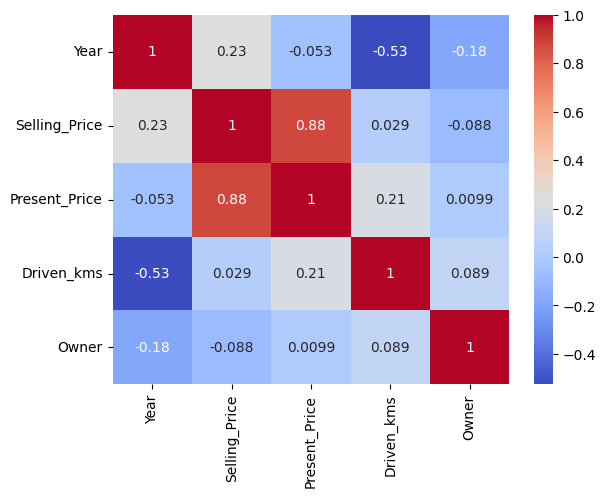

In [15]:
#Getting numerical columns needed for correlation
numerical_data_columns = df.select_dtypes(include = ['int64', 'float64']).columns

#Heatmap
sns.heatmap(df[numerical_data_columns].corr(), annot=True, cmap='coolwarm')
plt.show()



*   As the year increases, the selling price also increases by 23%.
*   Year has a negative correlation with present price, driven kms, and owner.



#Line Plot

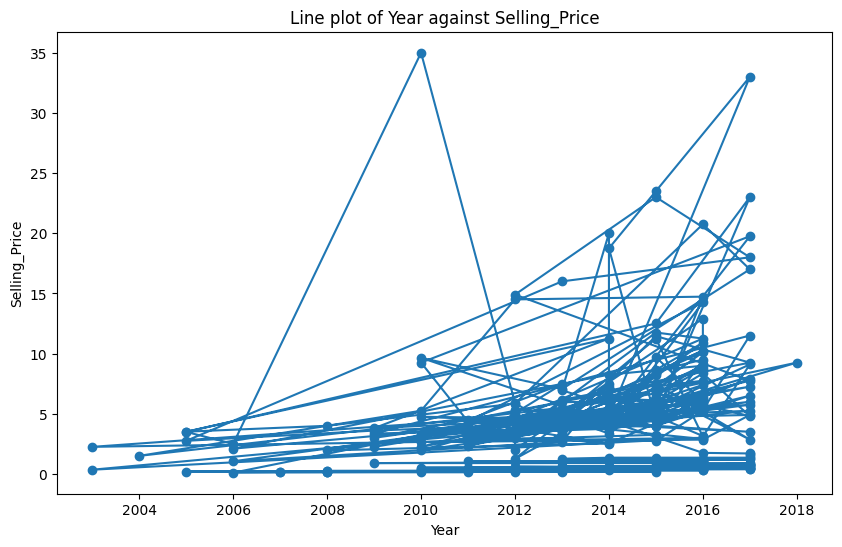

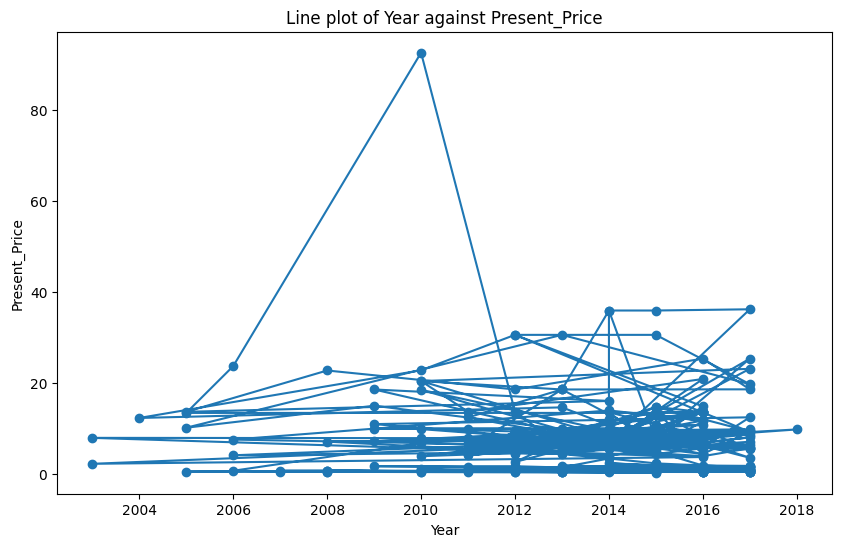

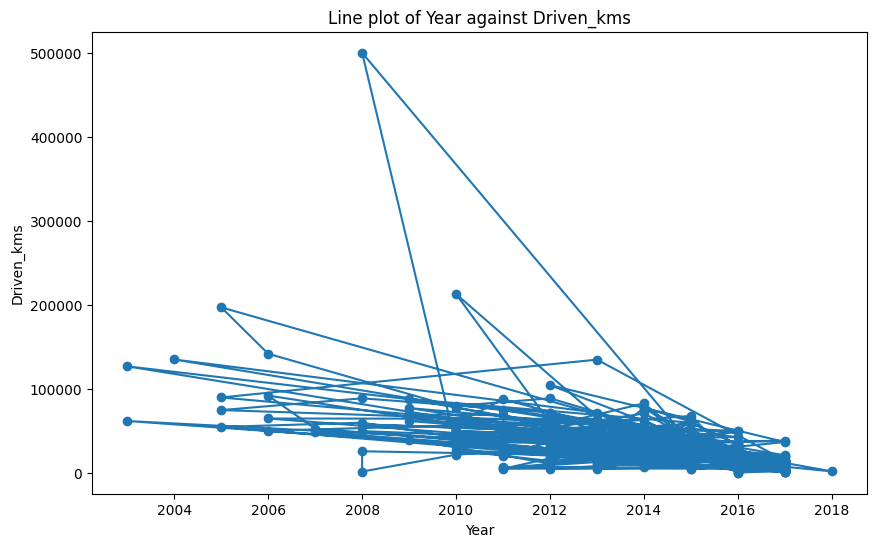

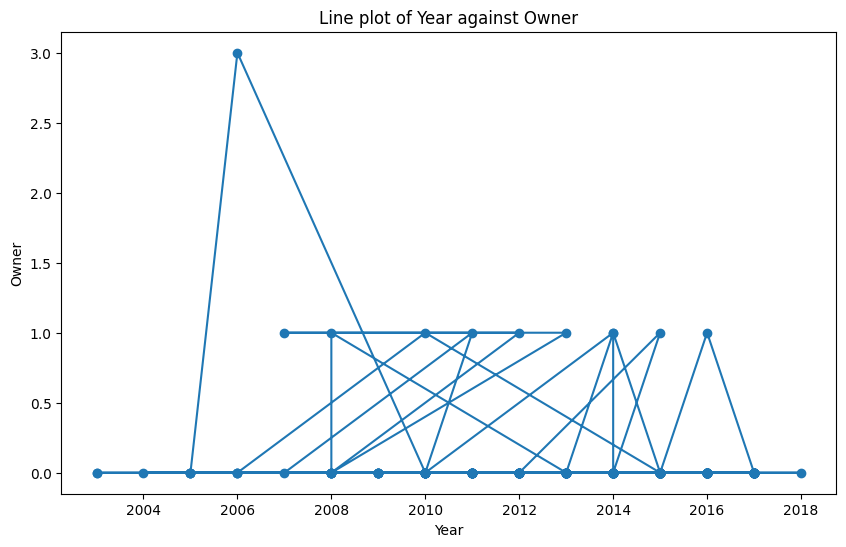

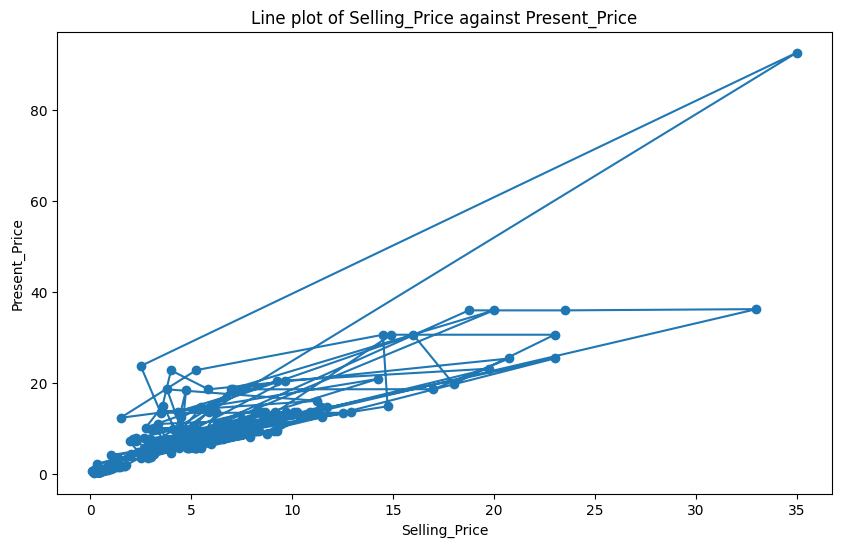

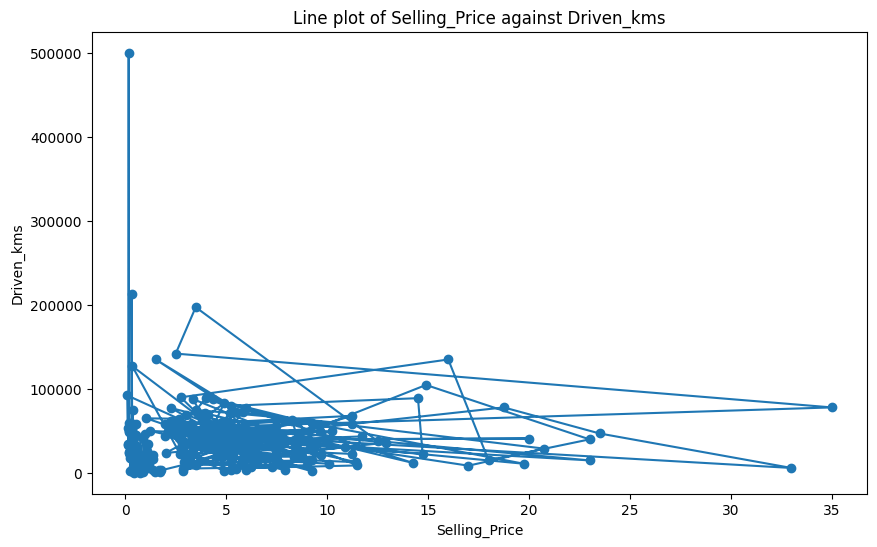

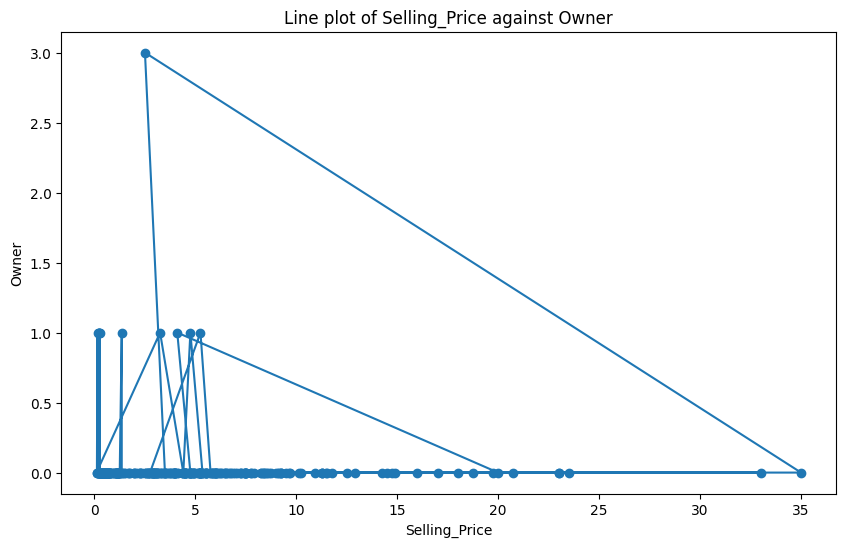

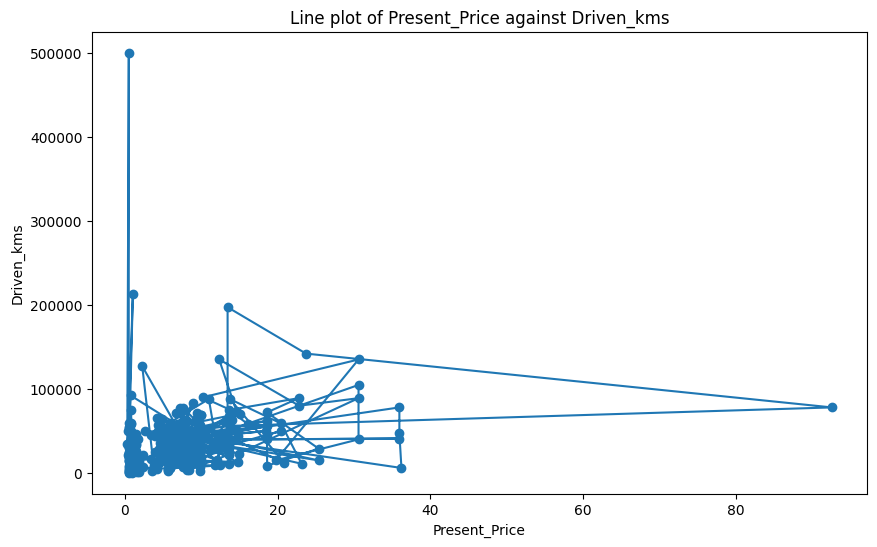

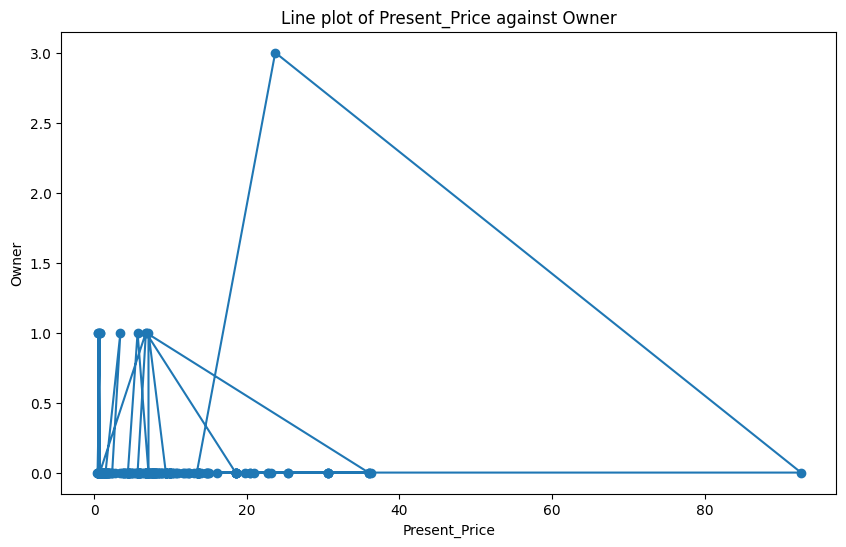

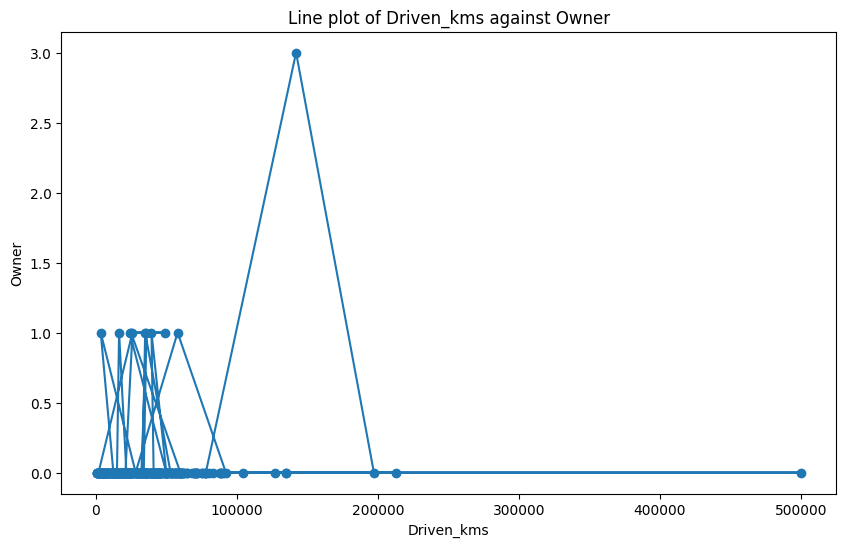

In [16]:
#Line plots for each pair in the numerical columns in the dataset
for i, column_x in enumerate(numerical_data_columns):
  for column_y in numerical_data_columns[(i + 1):]:
    plt.figure(figsize = (10, 6))
    plt.plot(df[column_x], df[column_y], marker = 'o')
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.title(f"Line plot of {column_x} against {column_y}")
    plt.show()


#Scatter plot

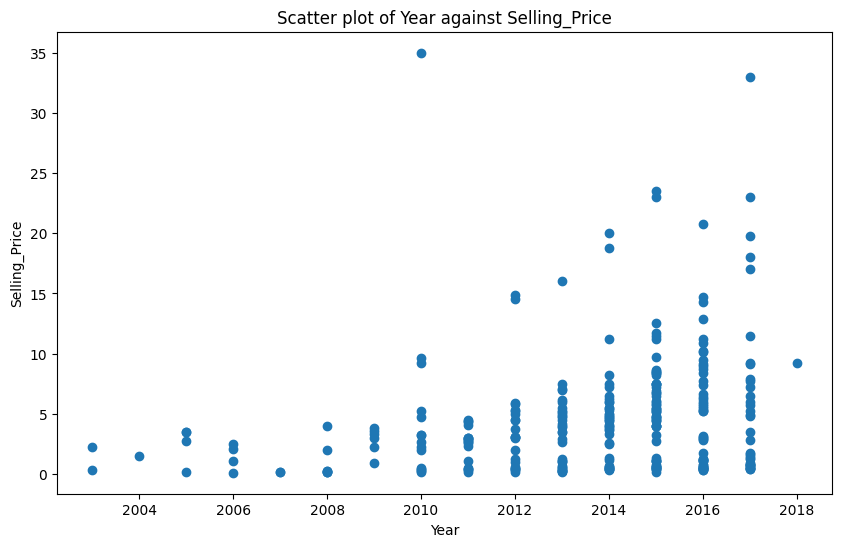

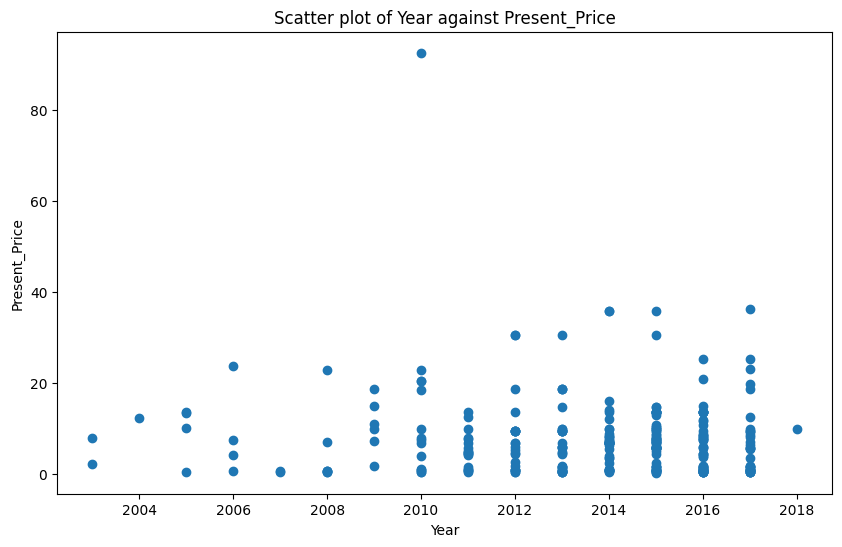

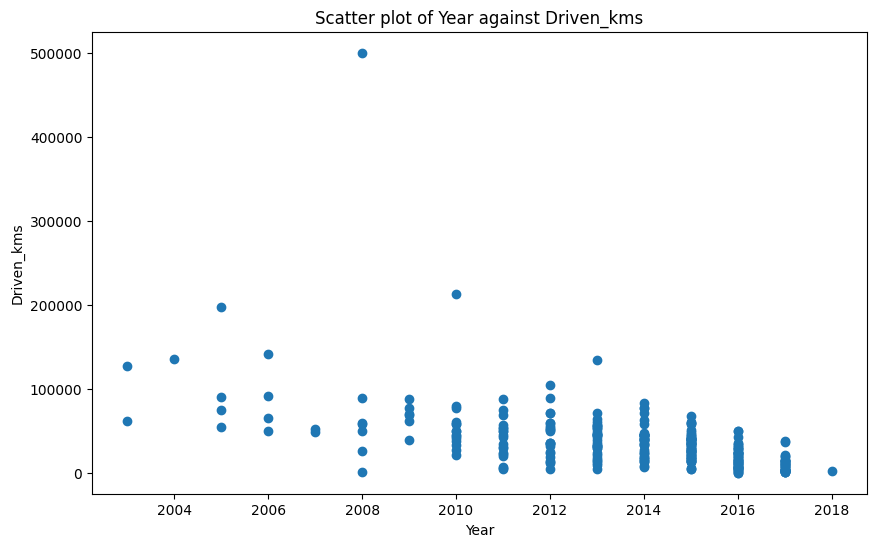

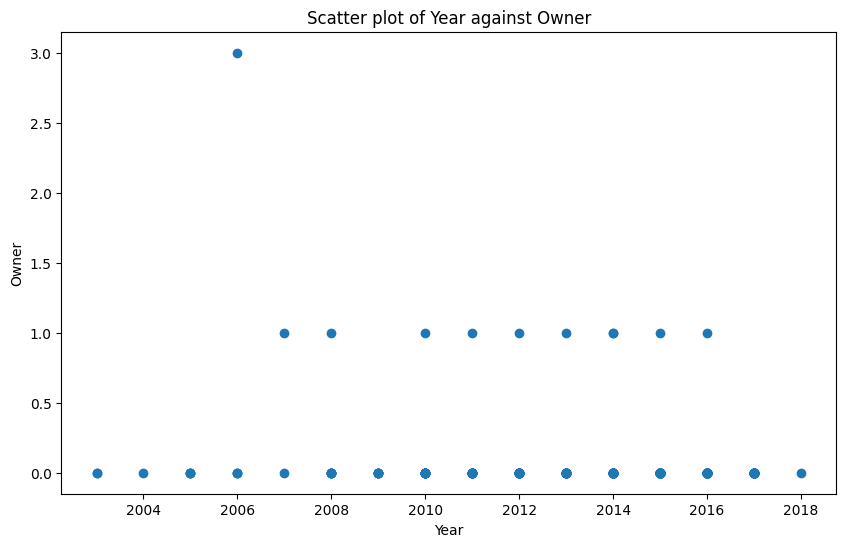

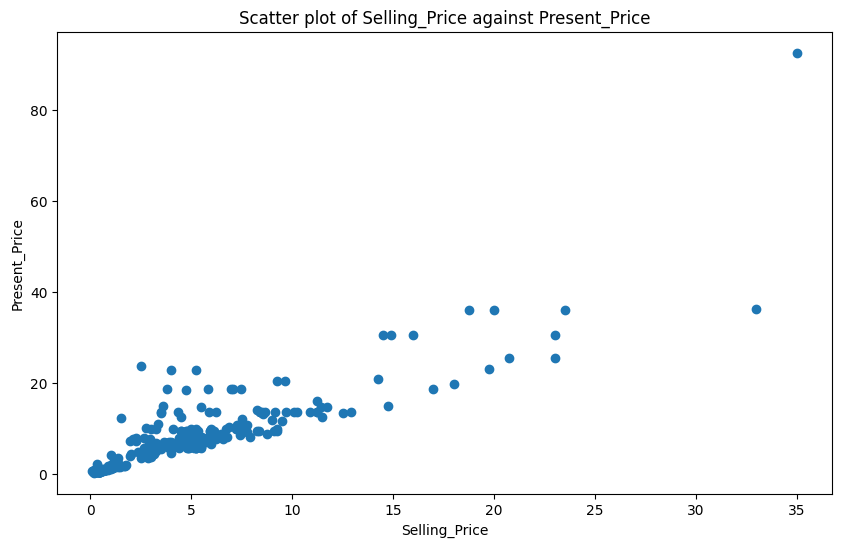

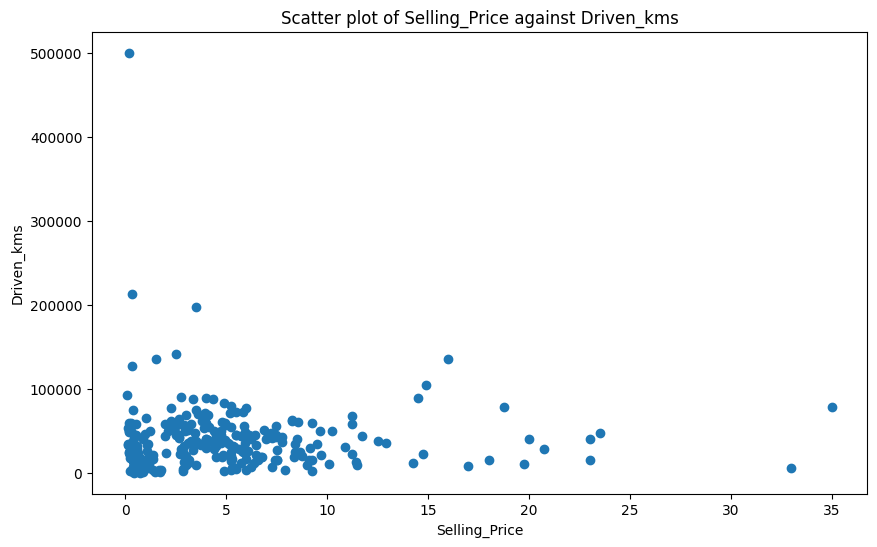

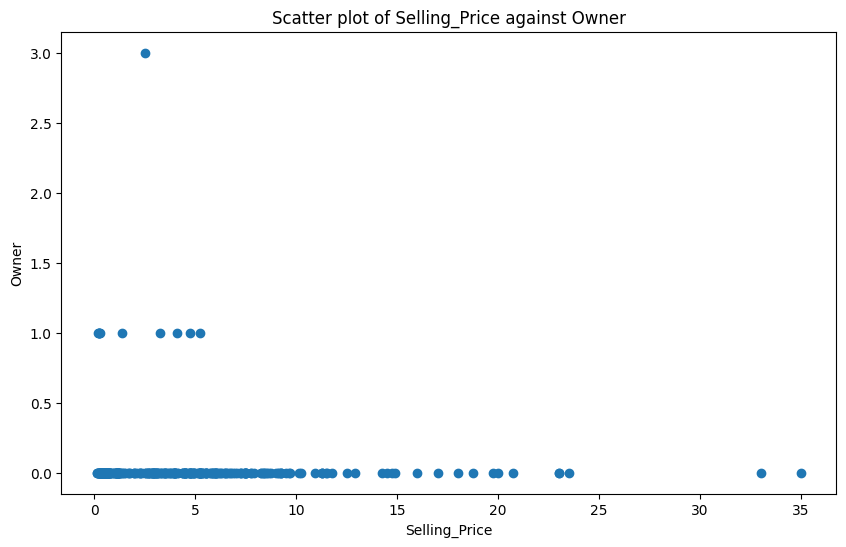

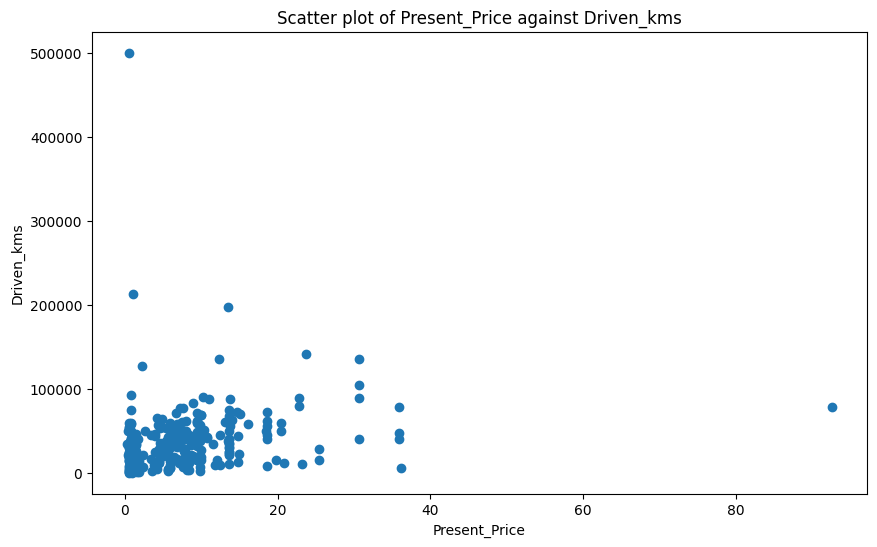

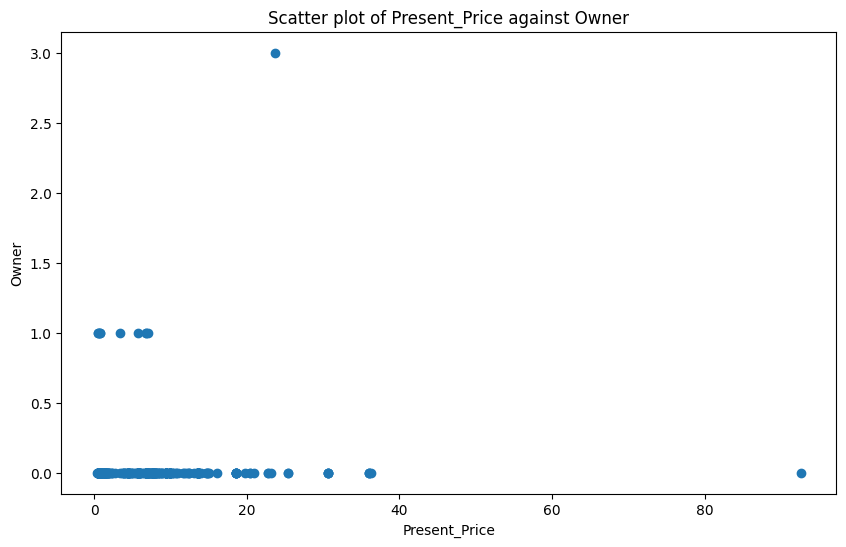

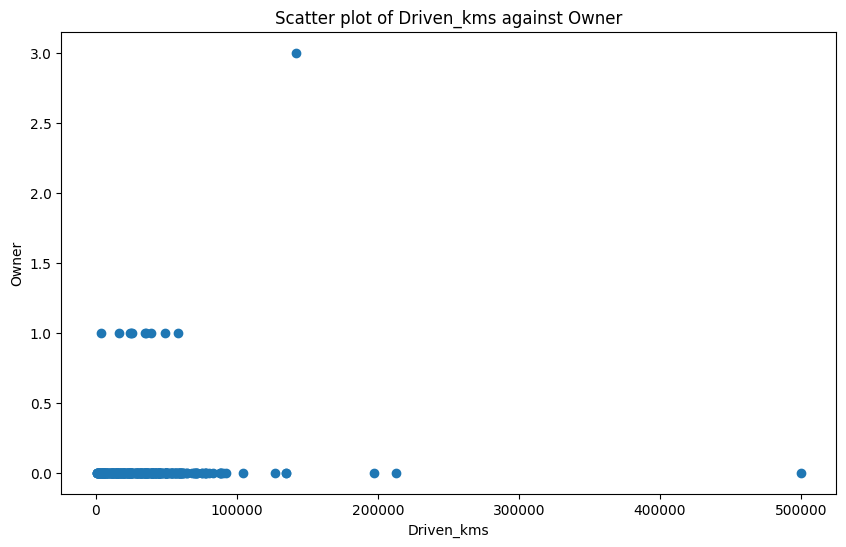

In [17]:
#Scatter plot for each pair in the numerical column
for i, column_x in enumerate(numerical_data_columns):
  for column_y in numerical_data_columns[(i + 1):]:
    plt.figure(figsize = (10, 6))
    plt.scatter(df[column_x], df[column_y])
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.title(f"Scatter plot of {column_x} against {column_y}")
    plt.show()

#Histogram

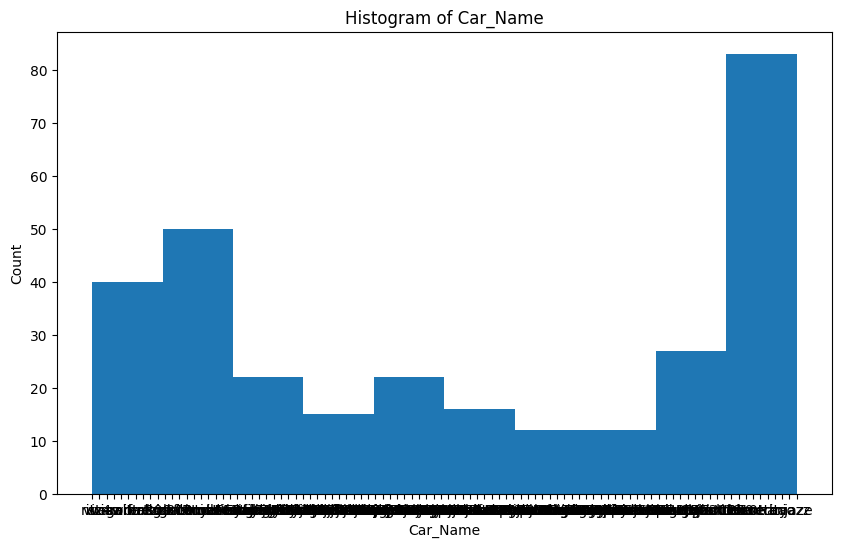

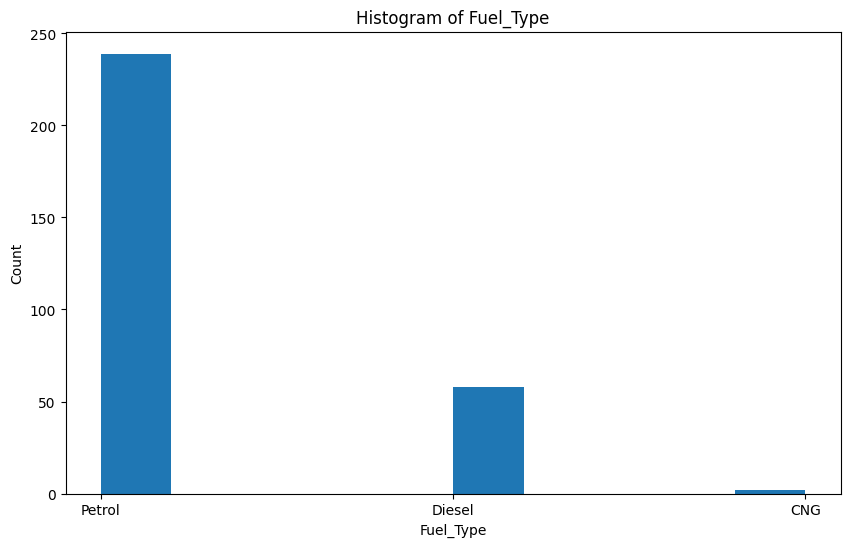

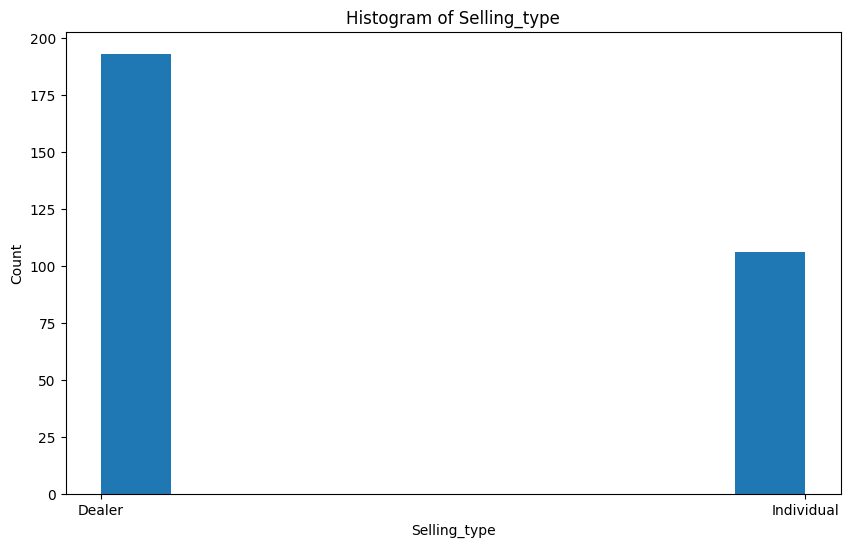

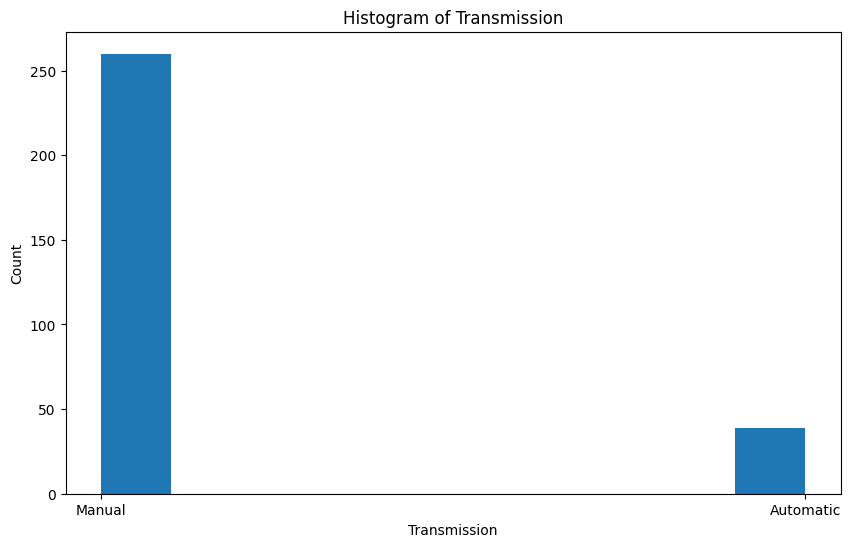

In [18]:
#Getting categorical columns in the dataset
categorical_columns = df.select_dtypes(include = ['object']).columns

#Histogram for each categorical column
for column in categorical_columns:
  plt.figure(figsize = (10, 6))
  plt.hist(df[column])
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title(f"Histogram of {column}")
  plt.show()

#Box Plot

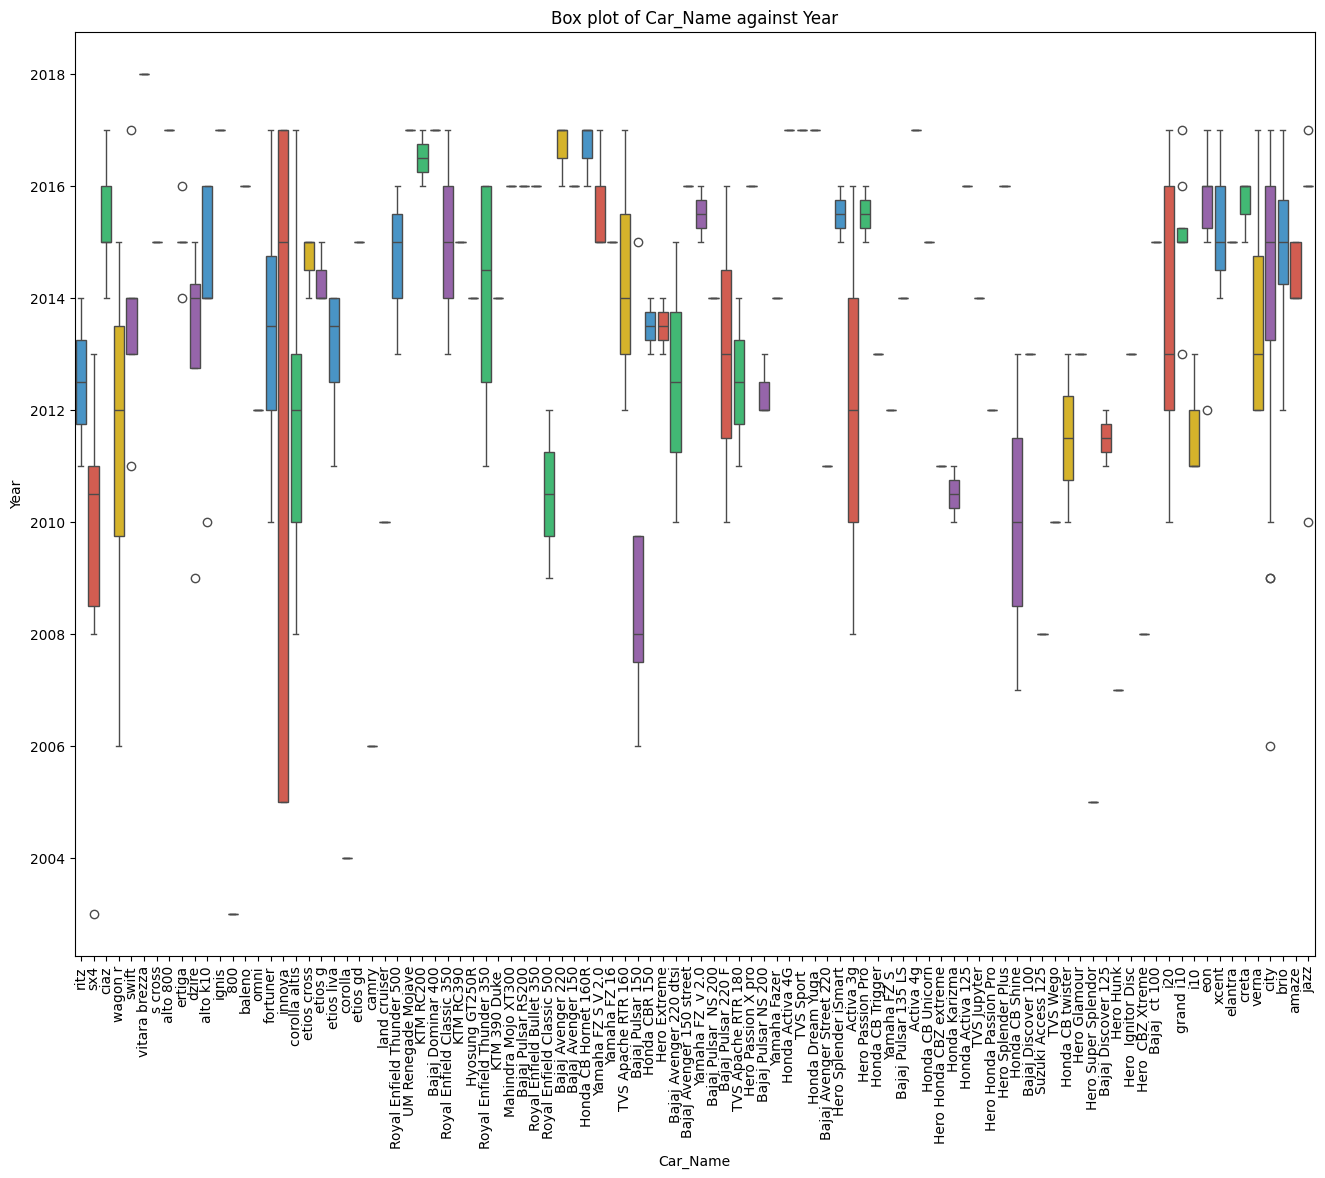

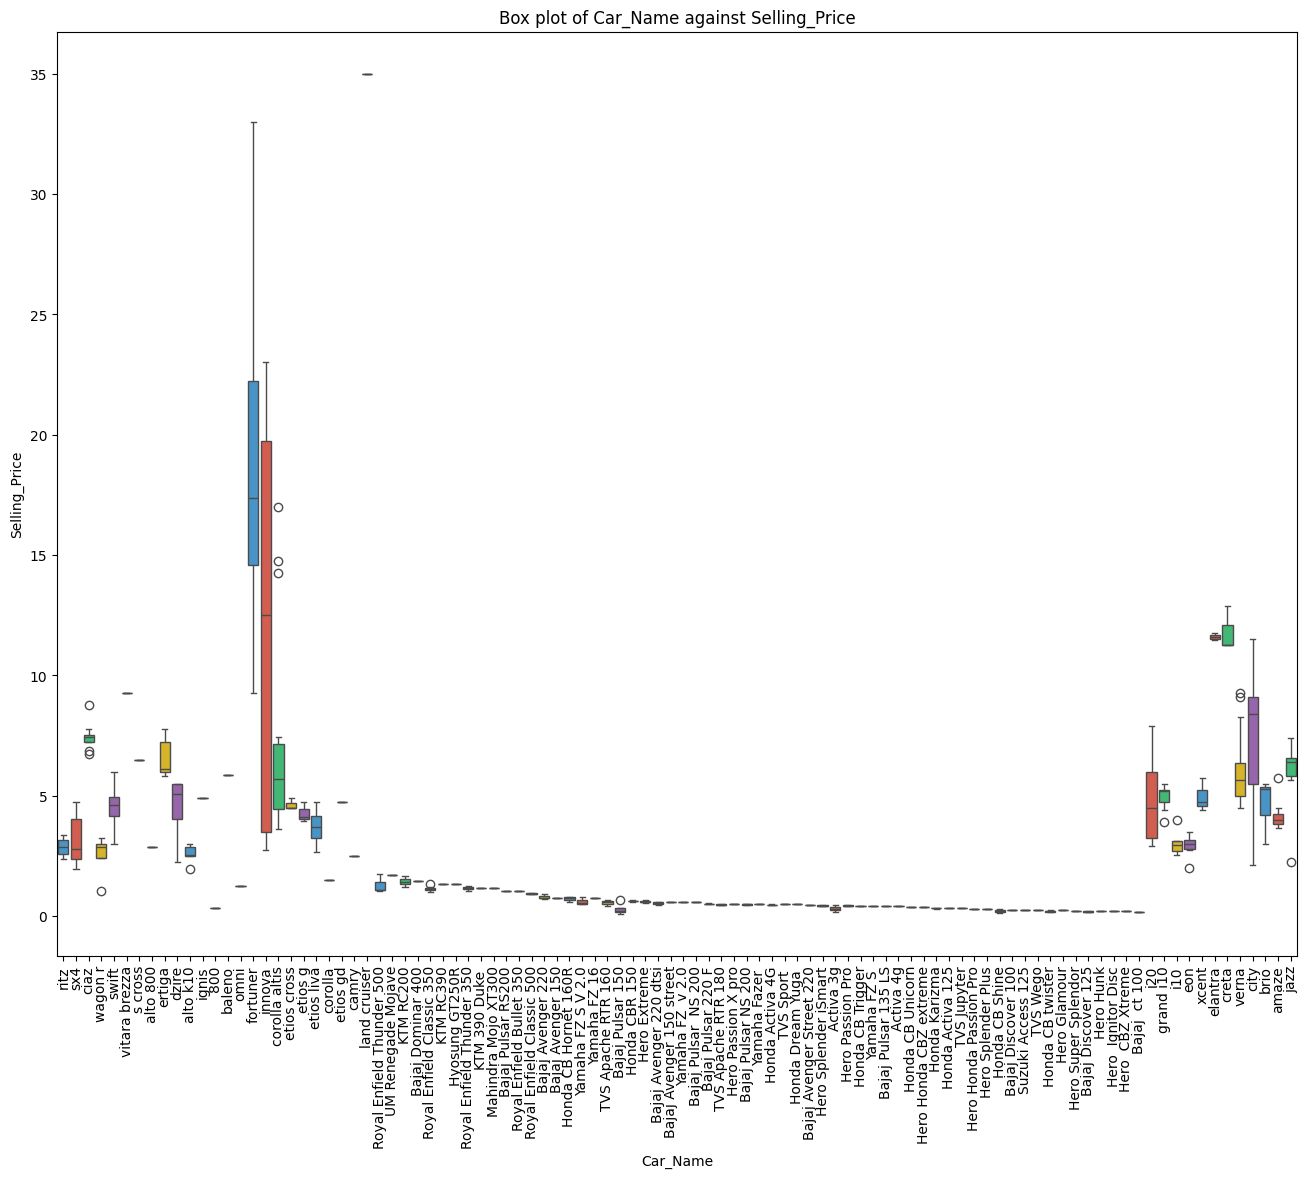

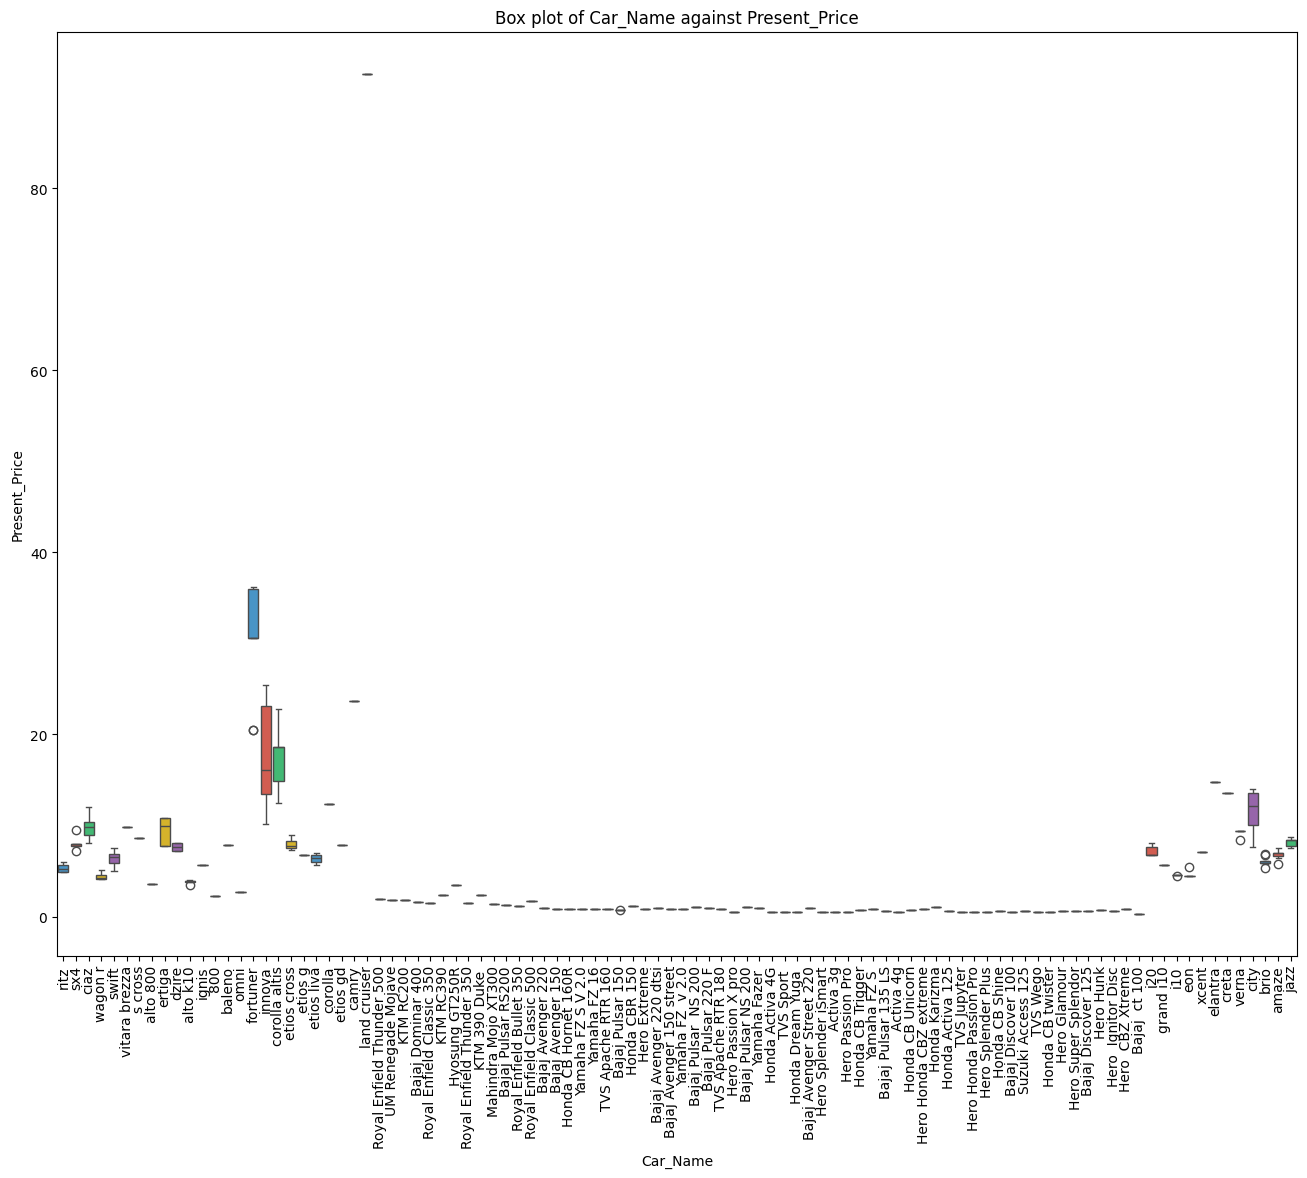

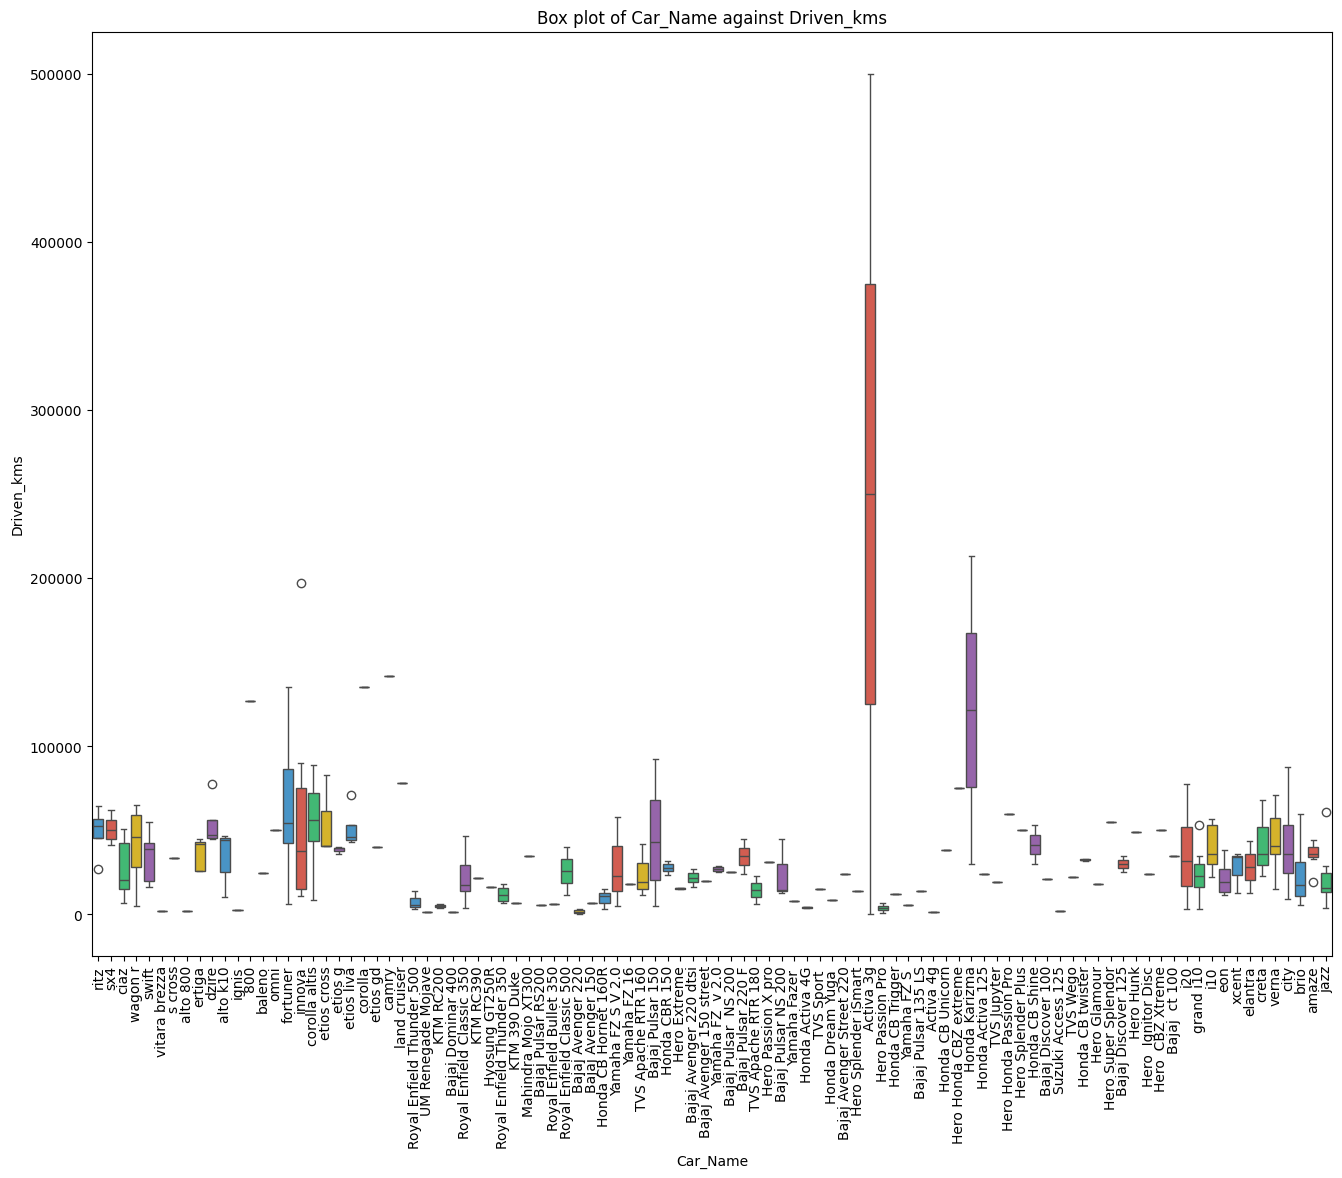

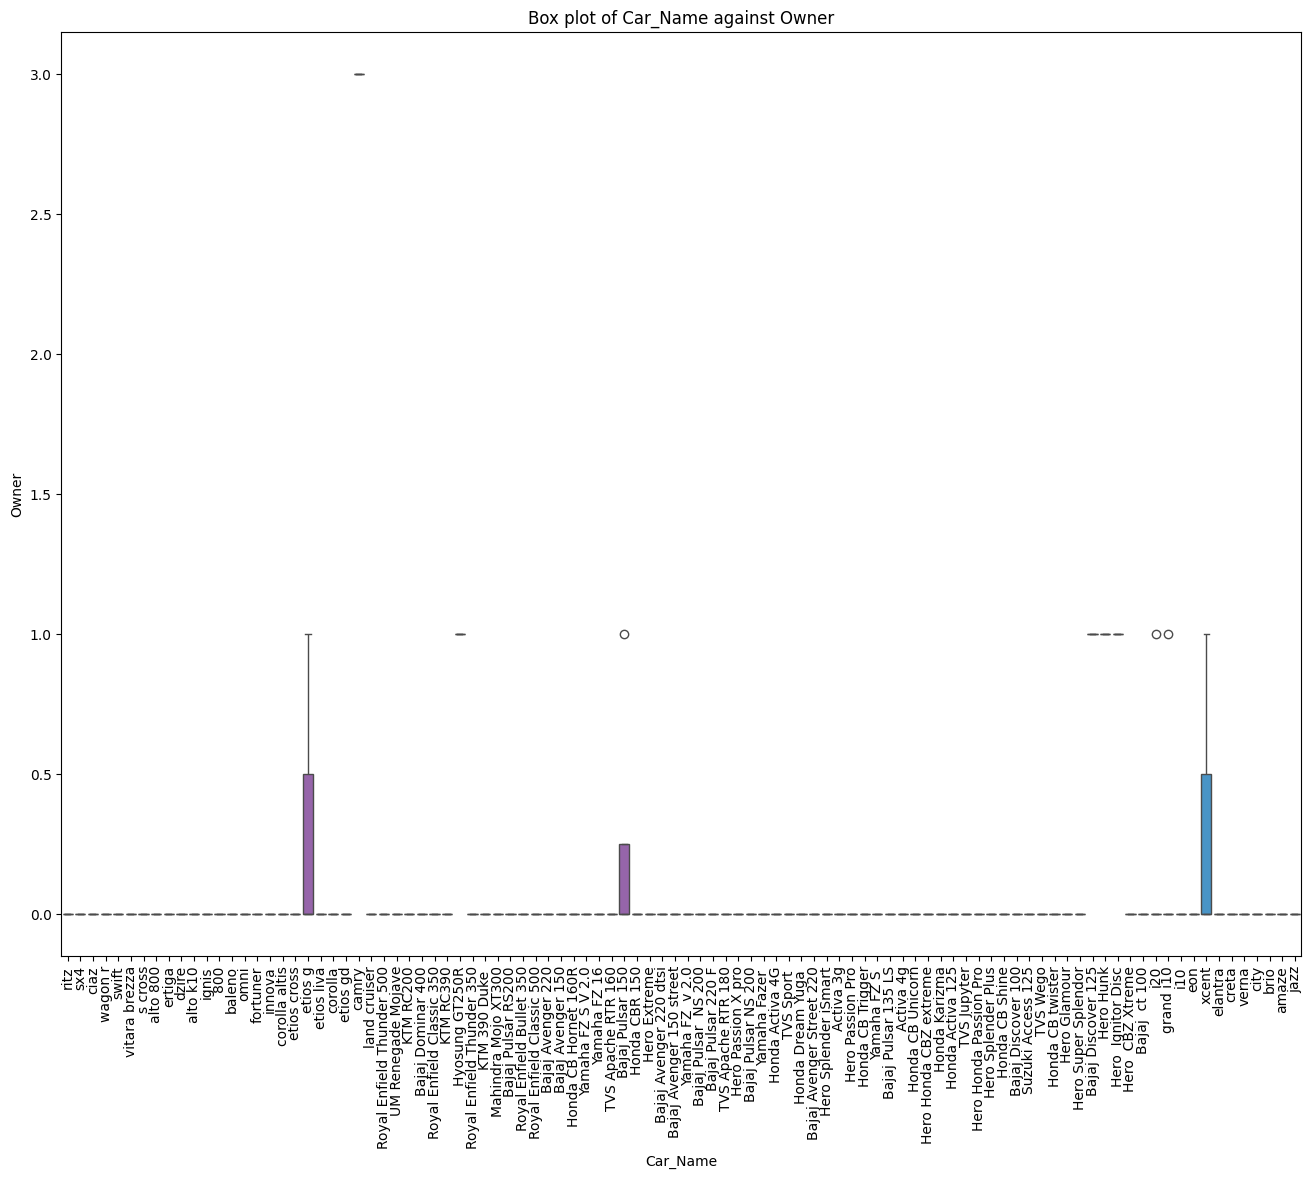

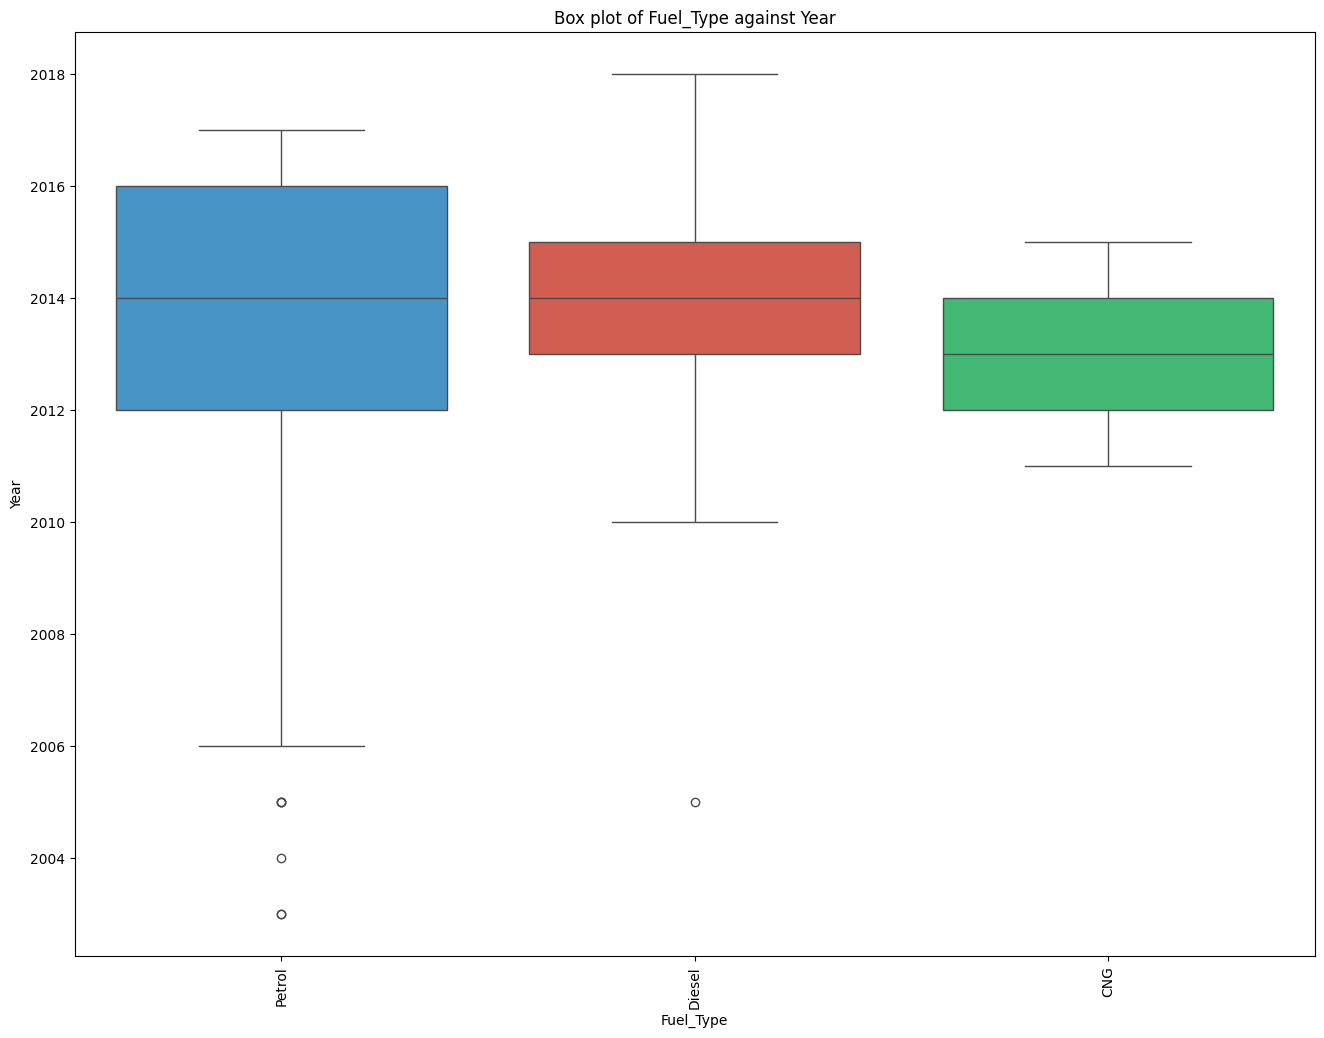

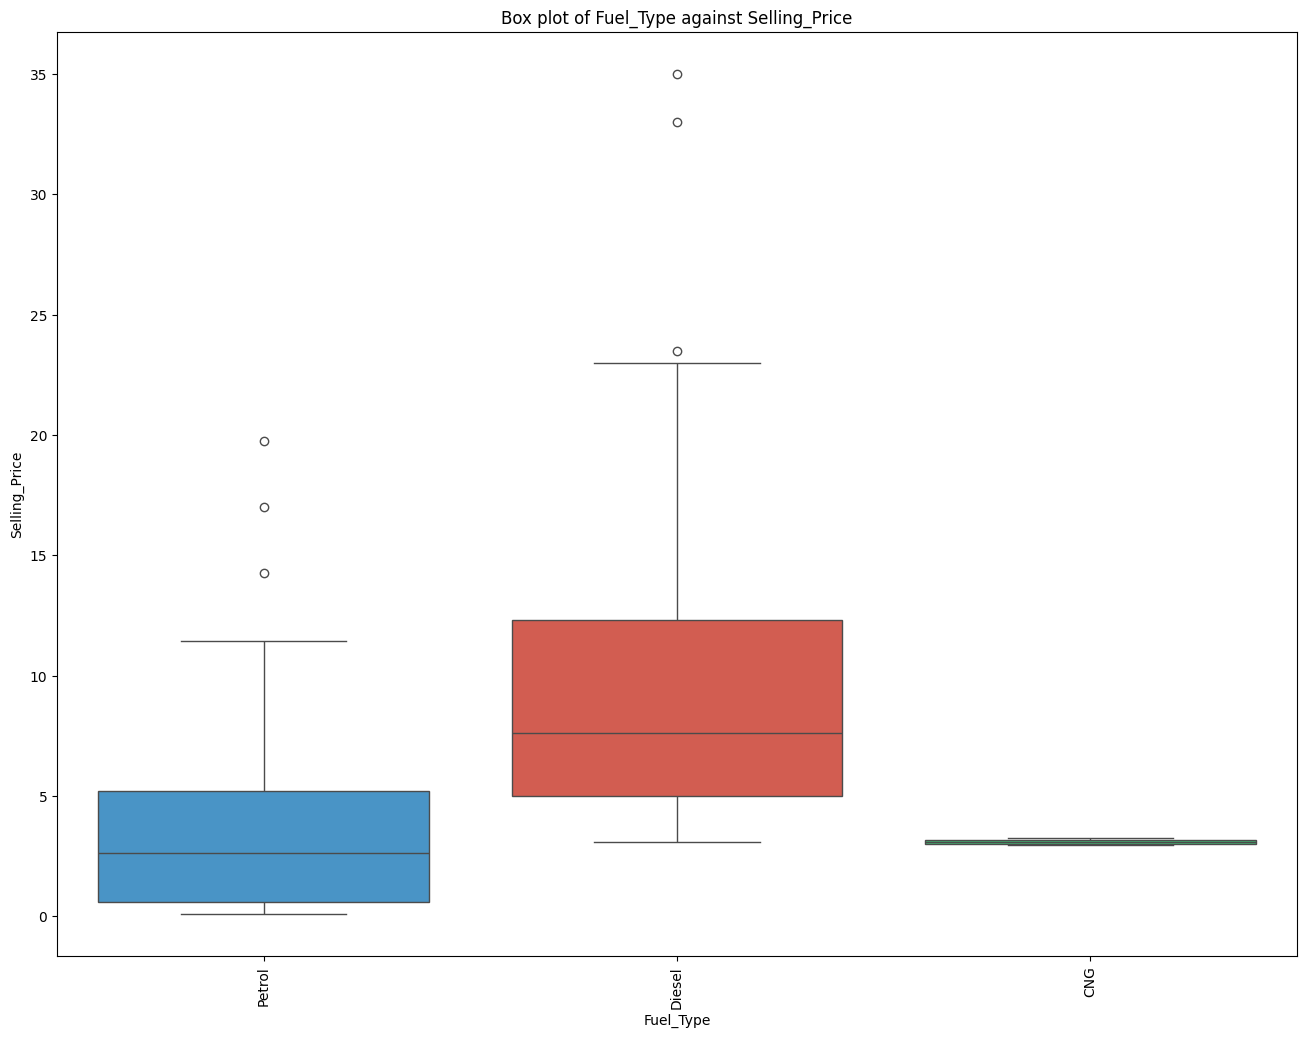

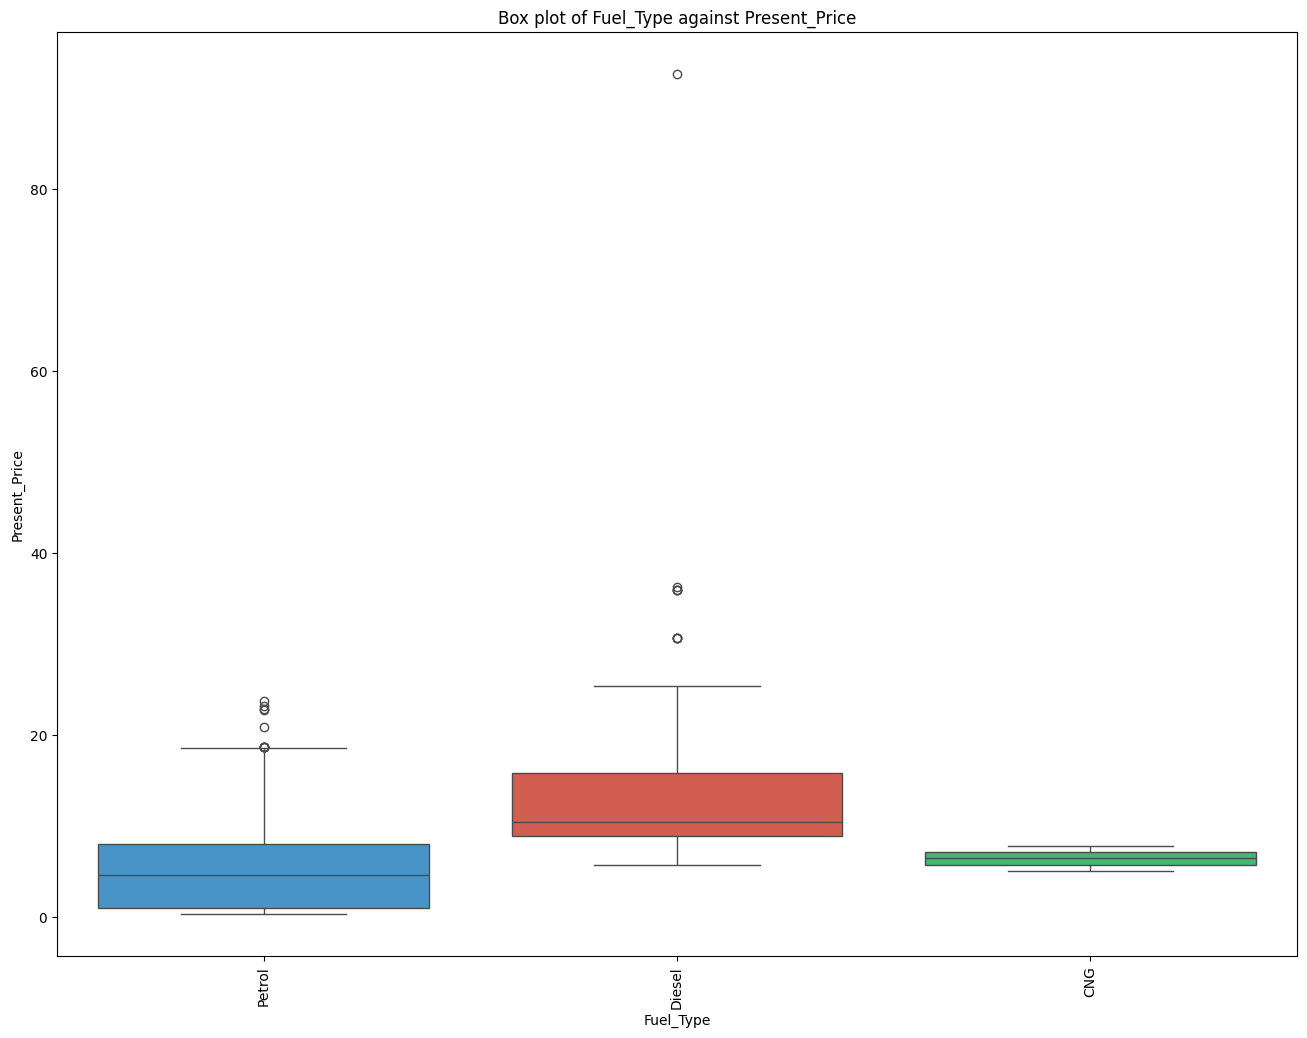

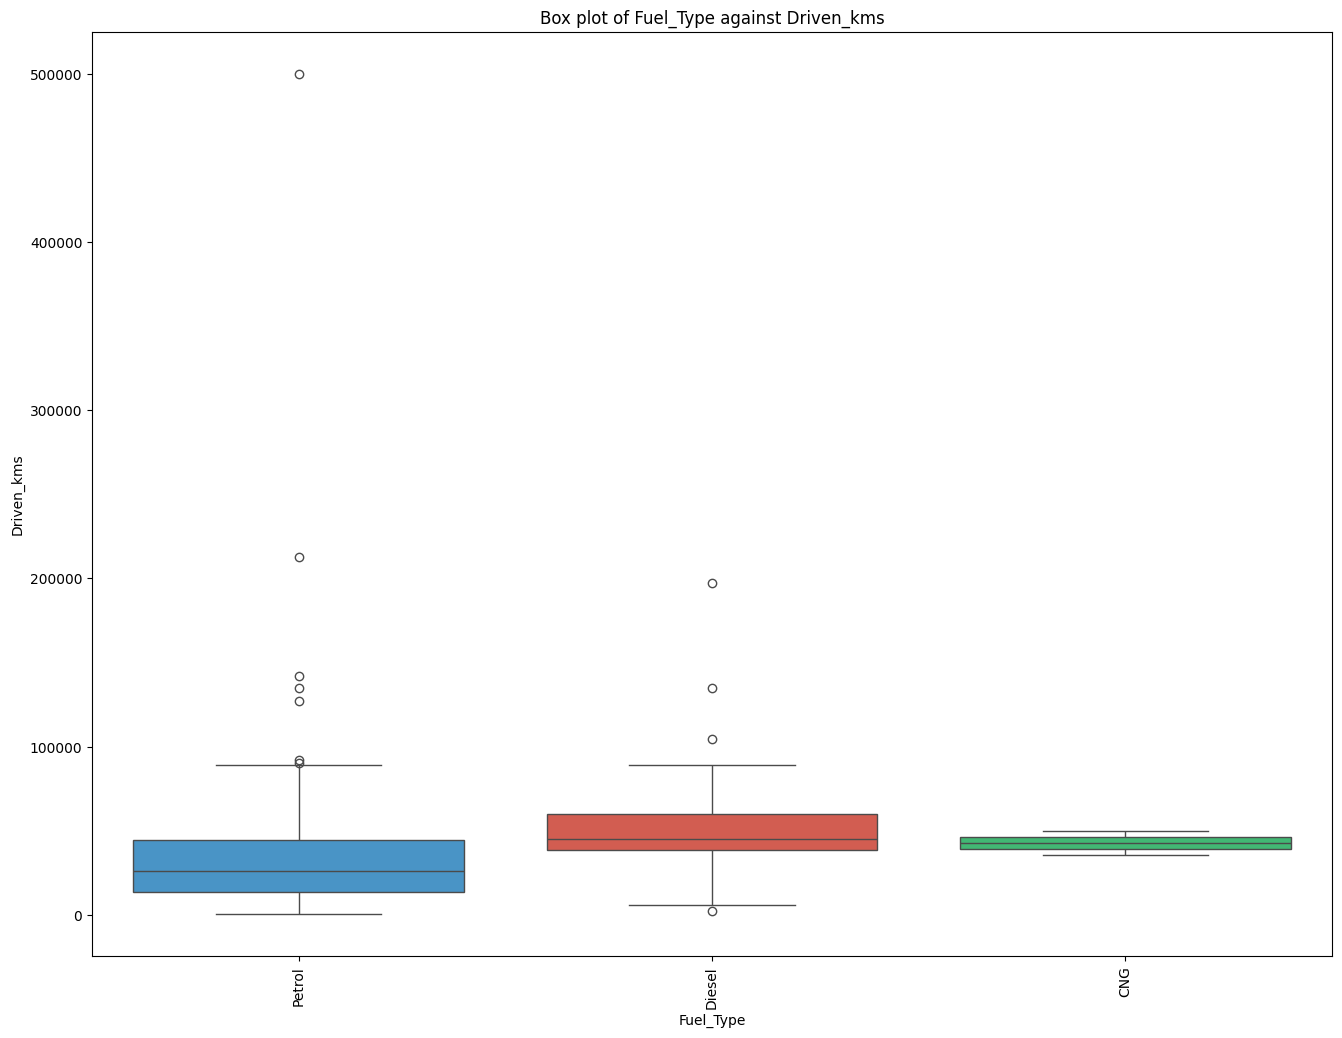

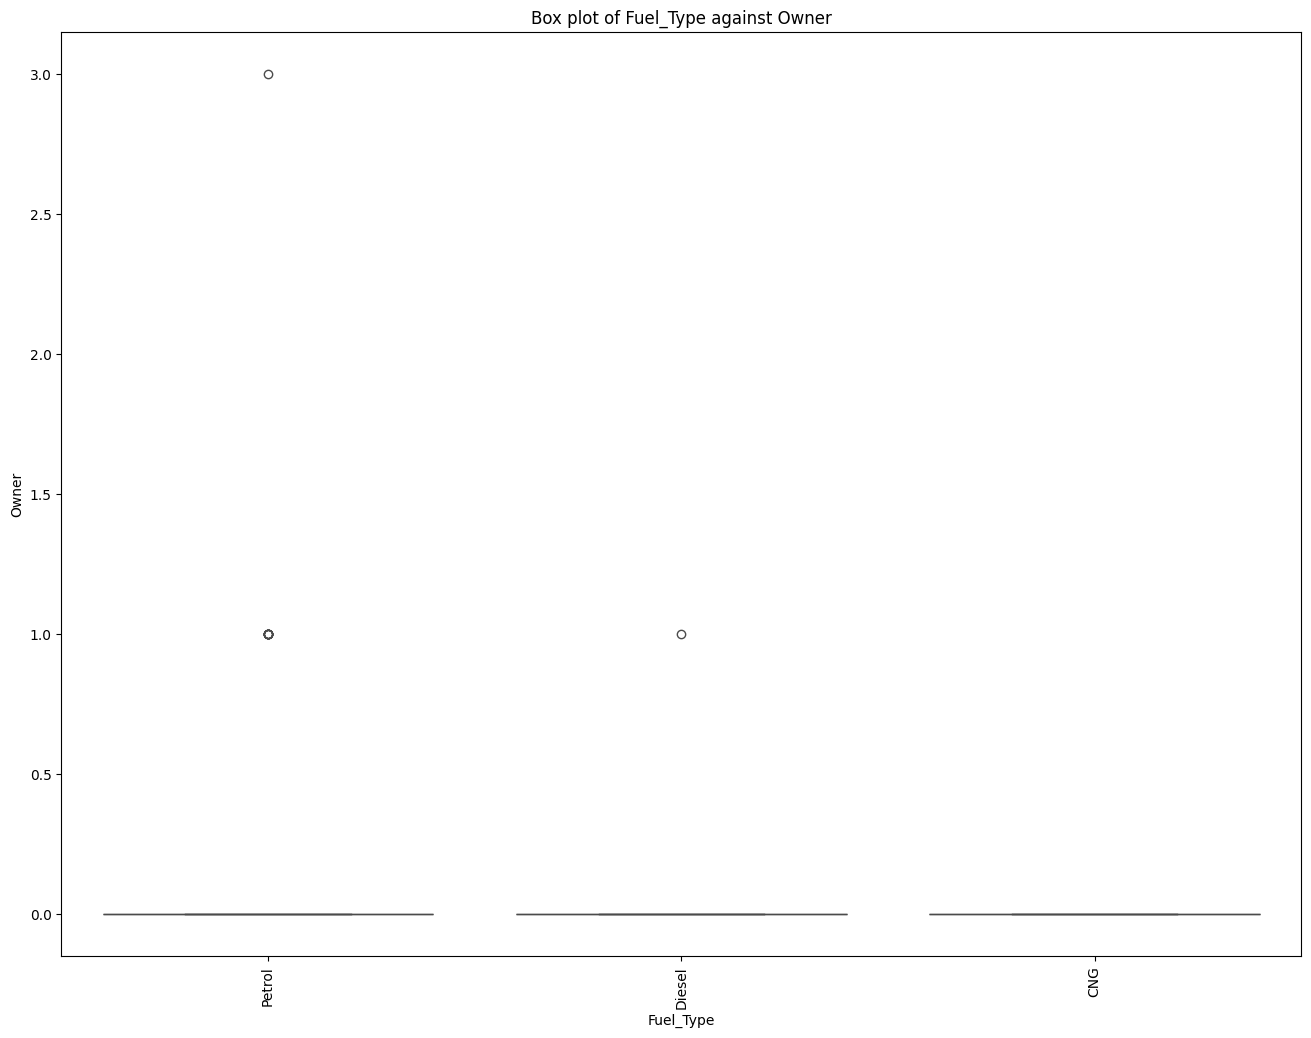

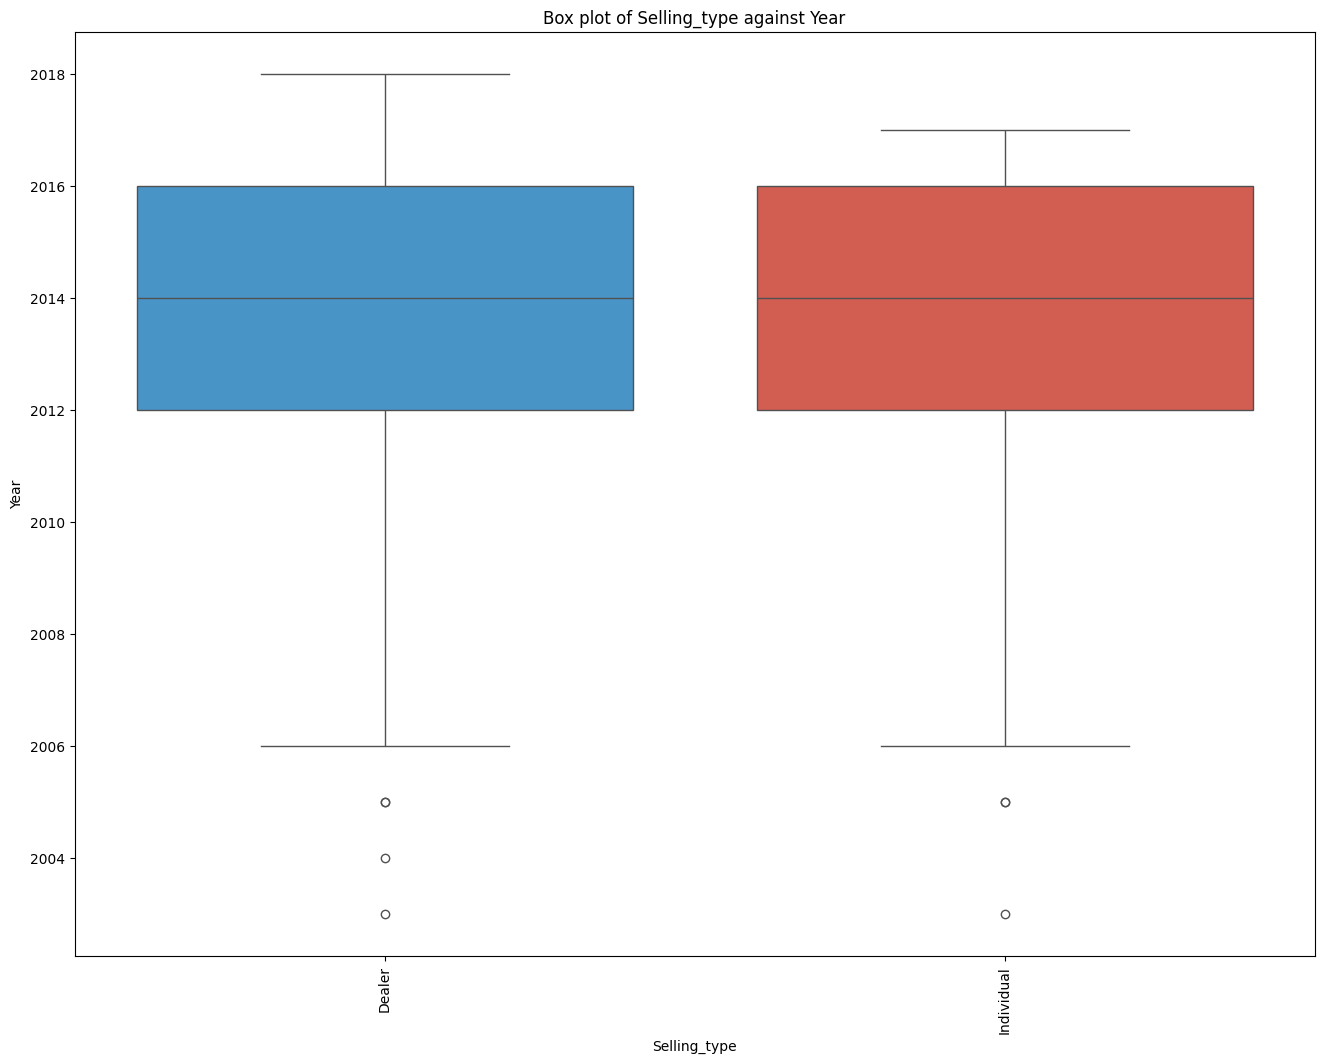

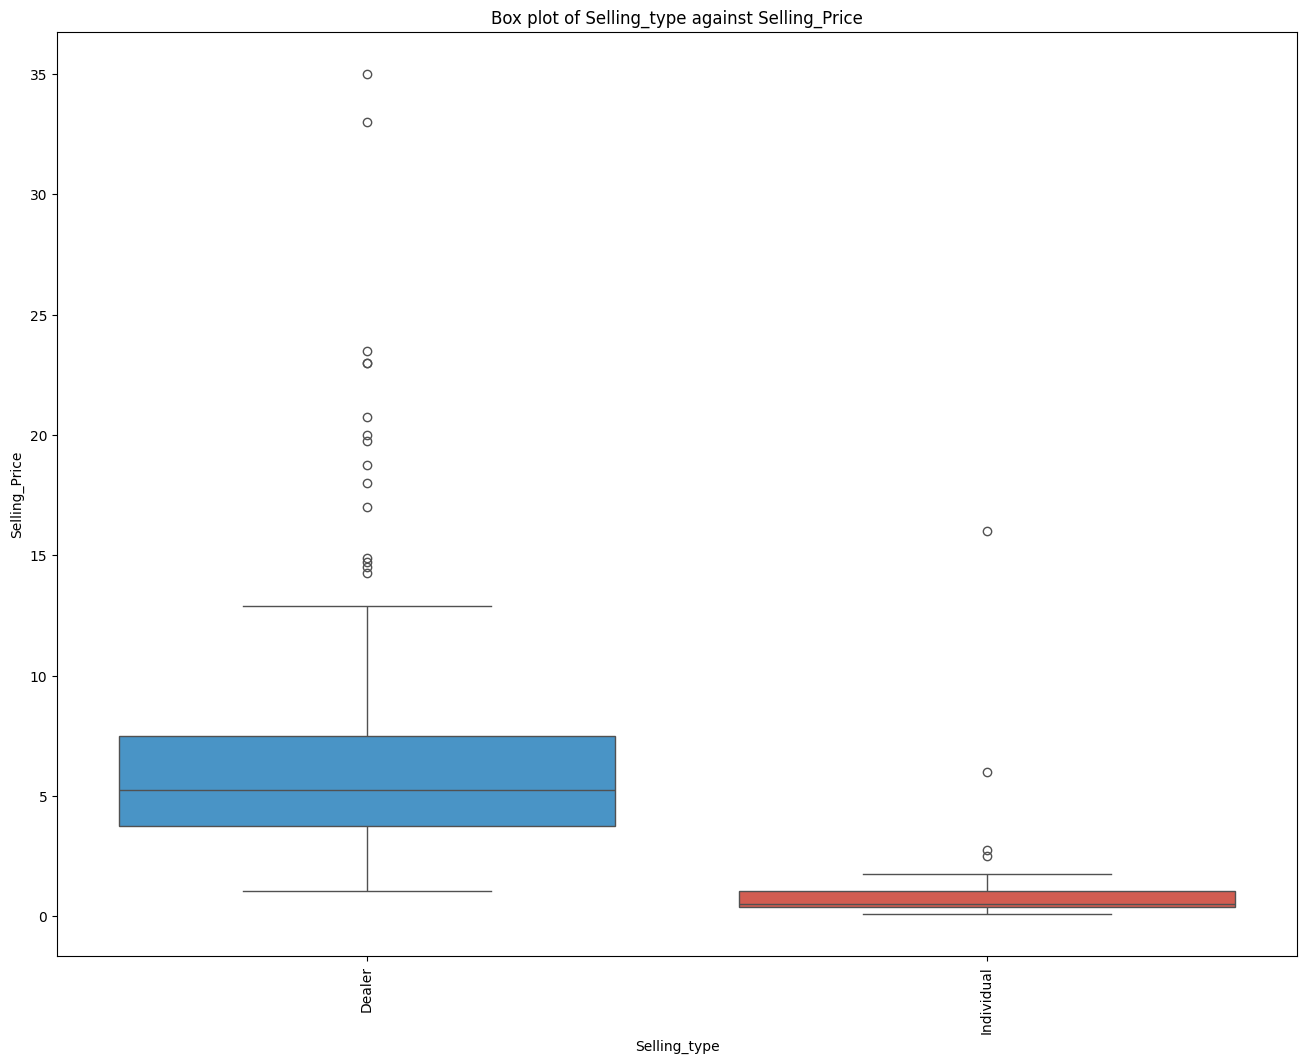

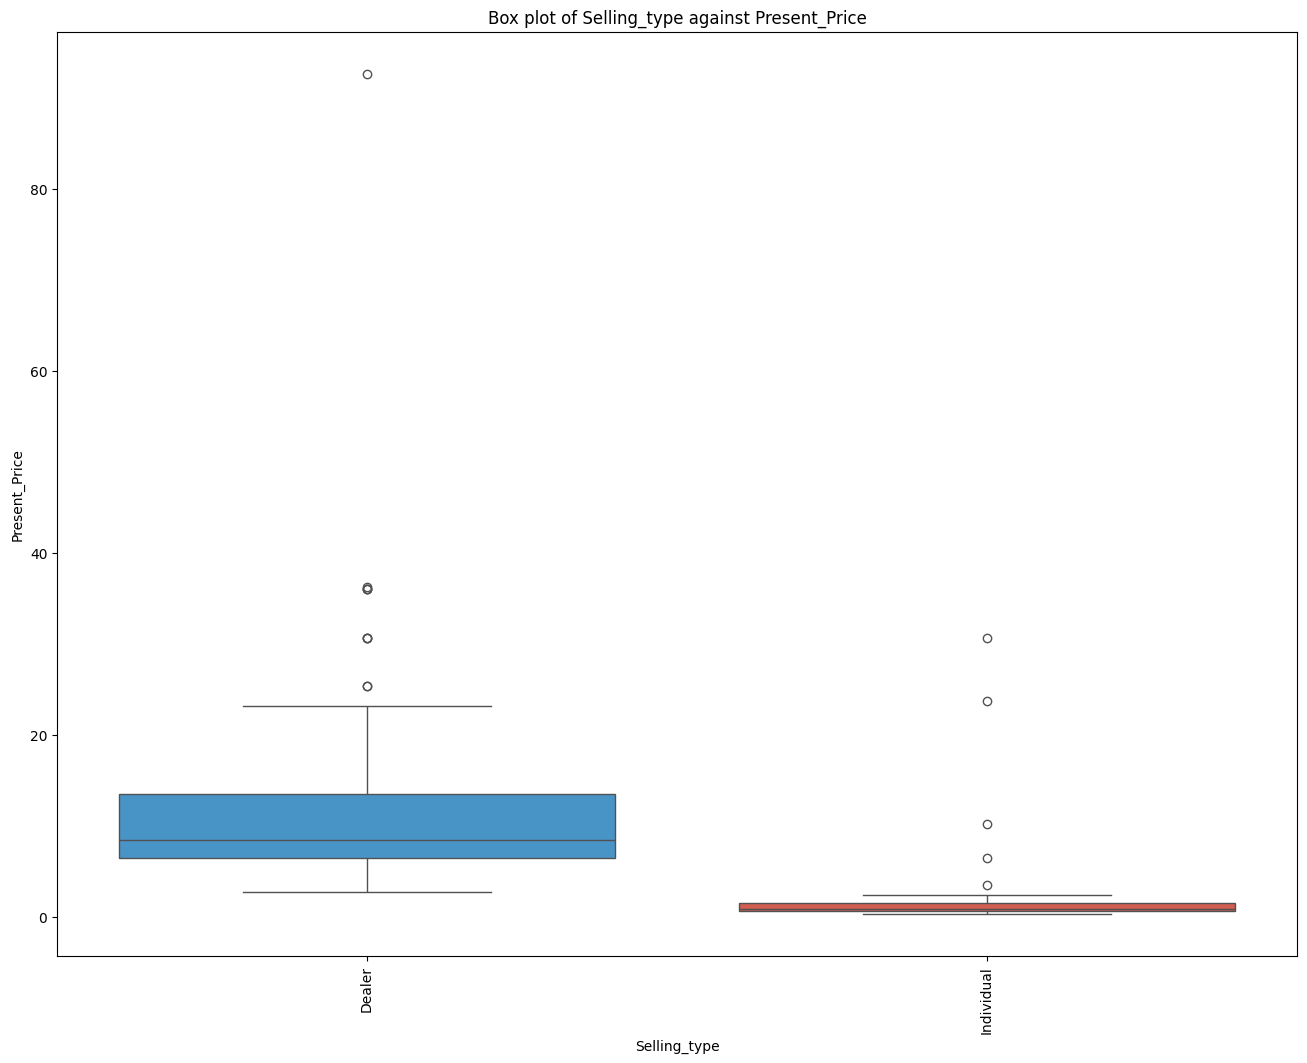

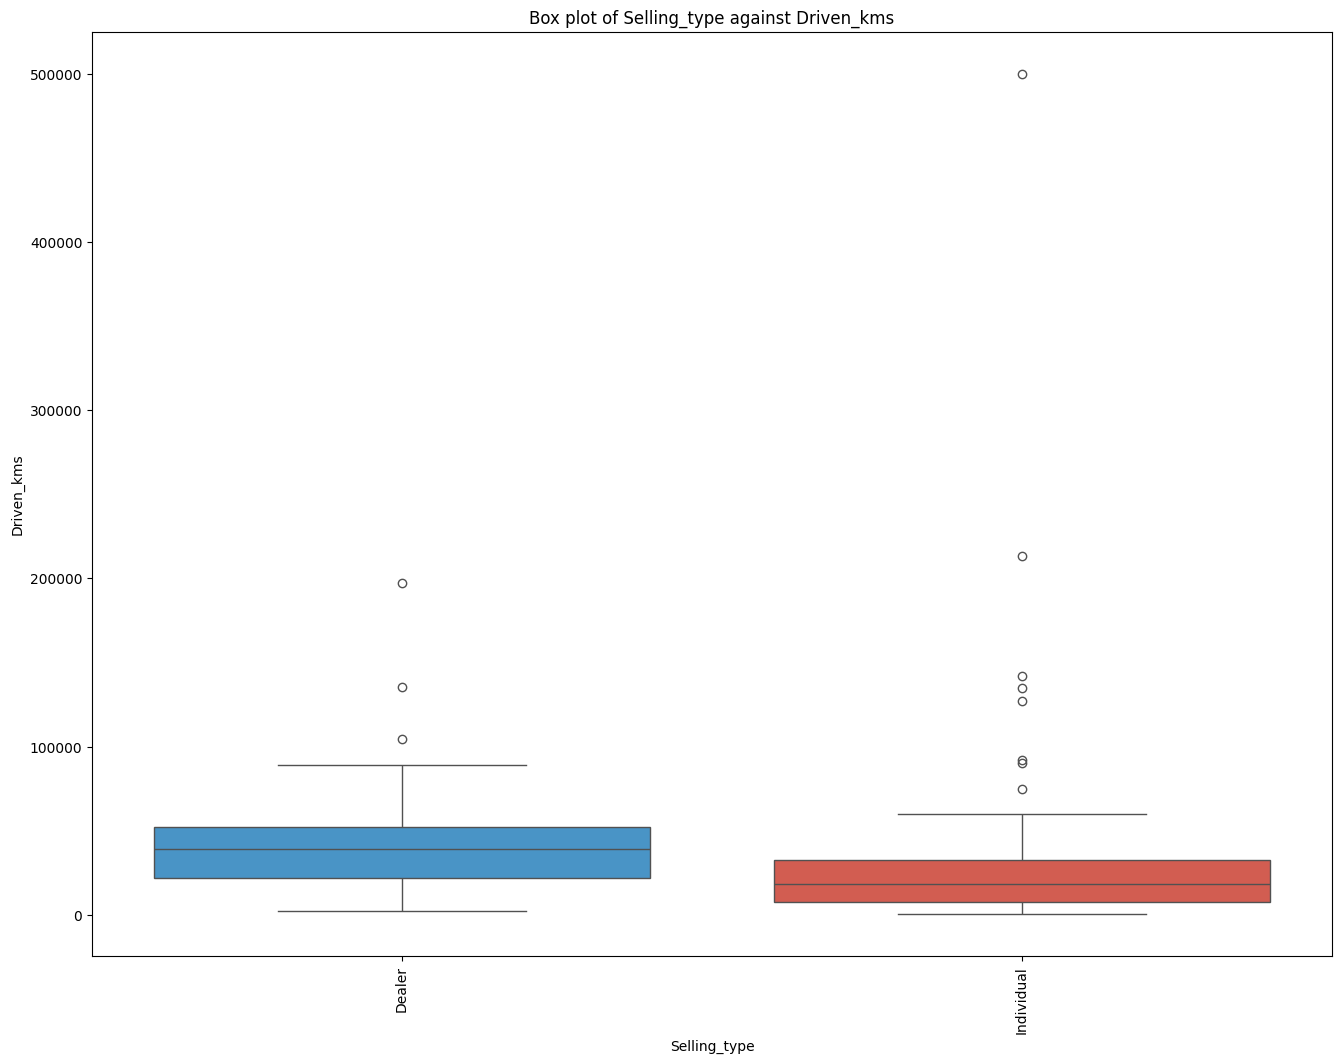

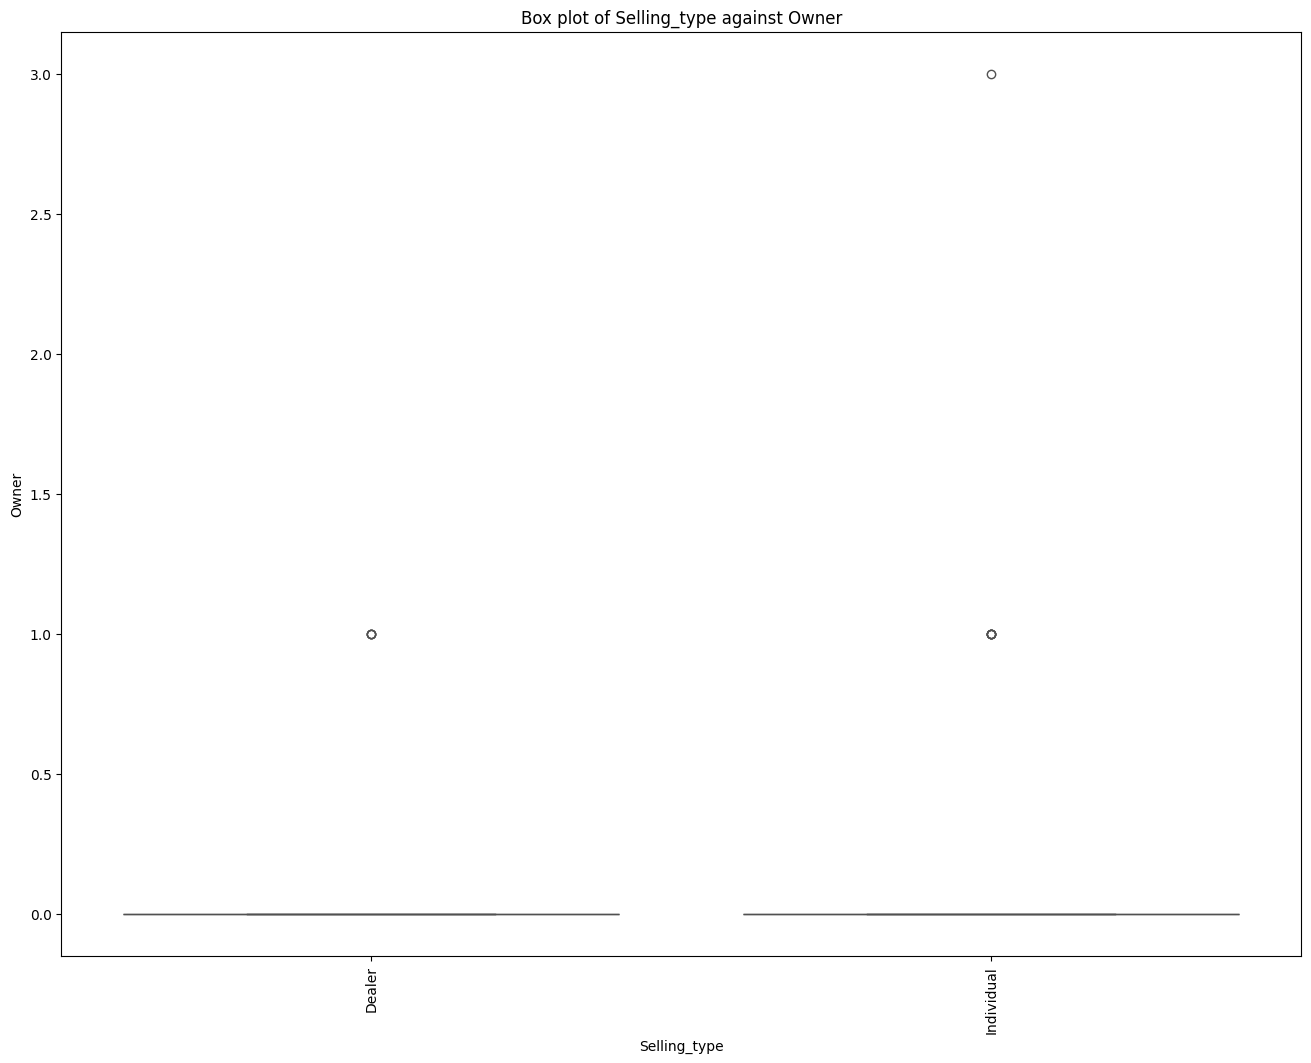

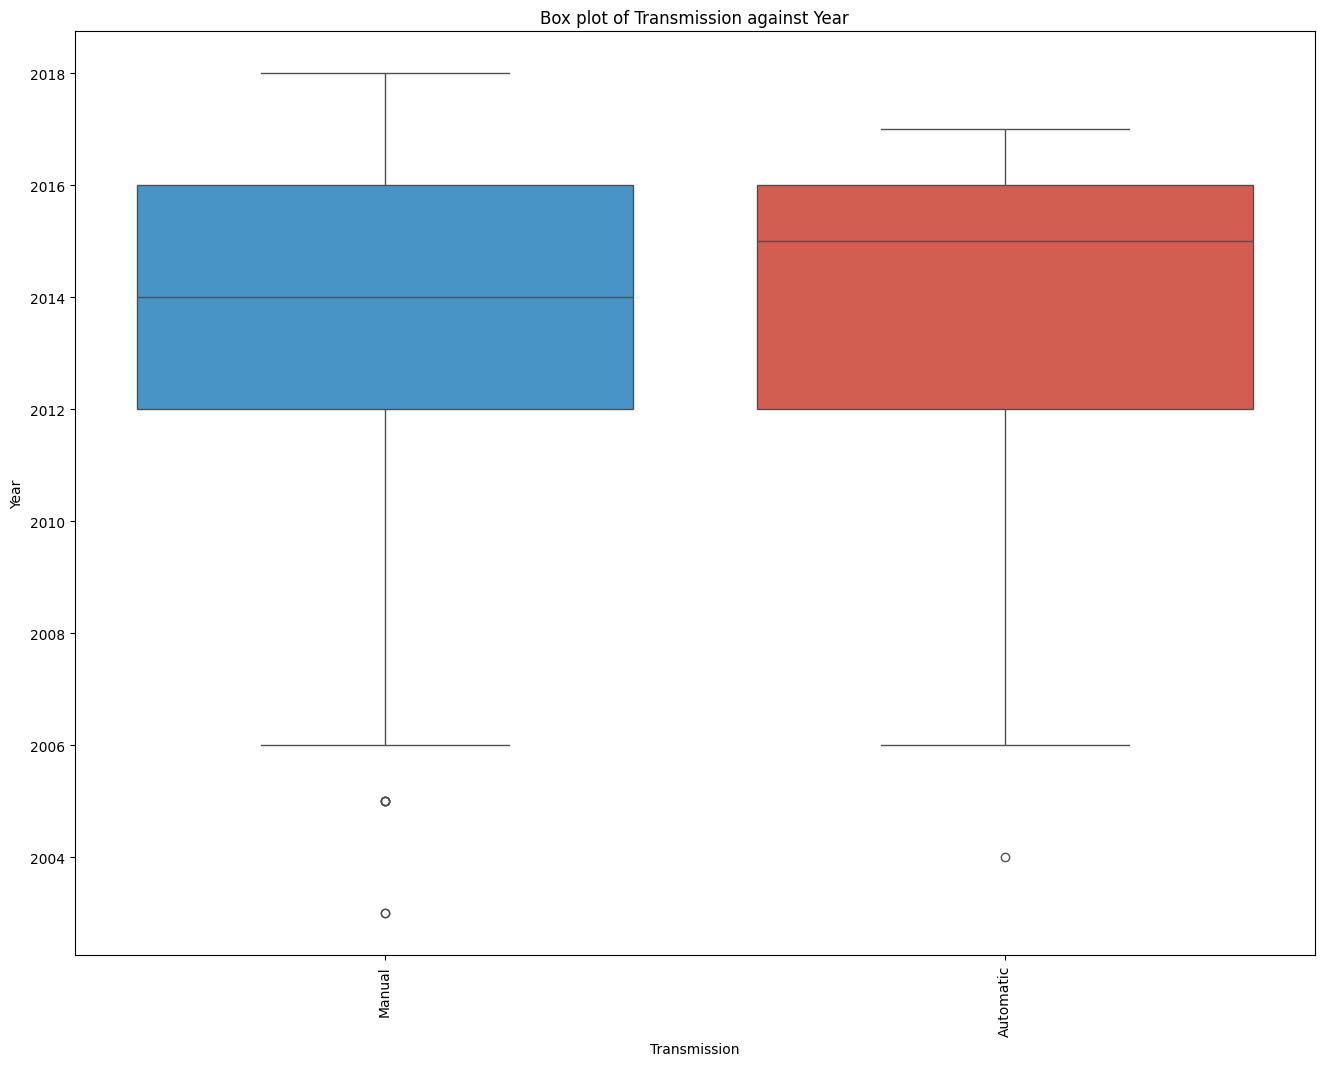

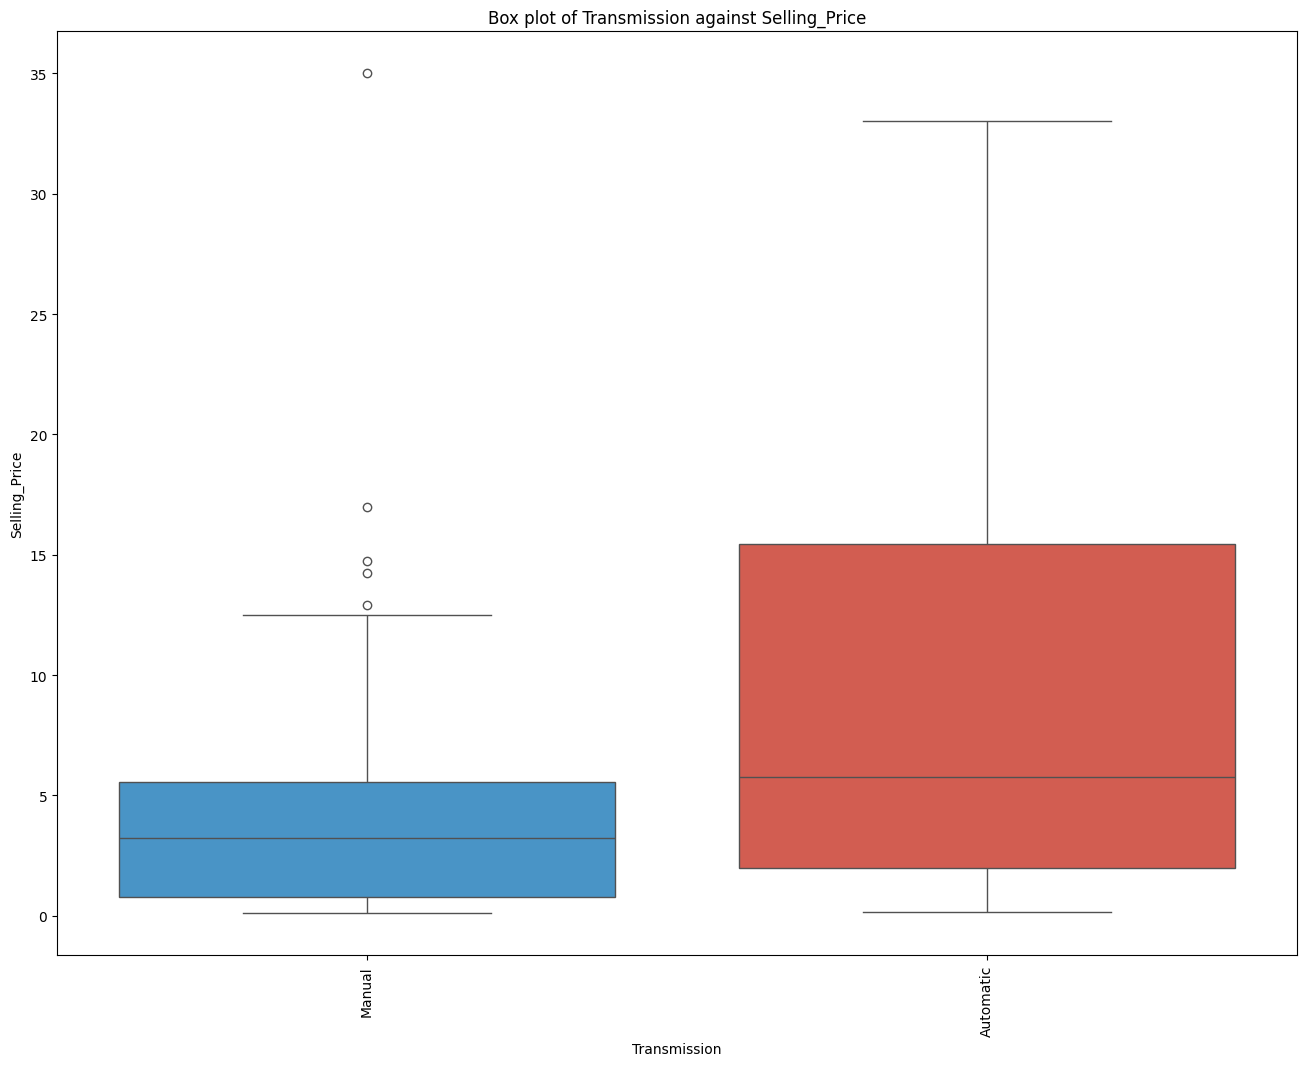

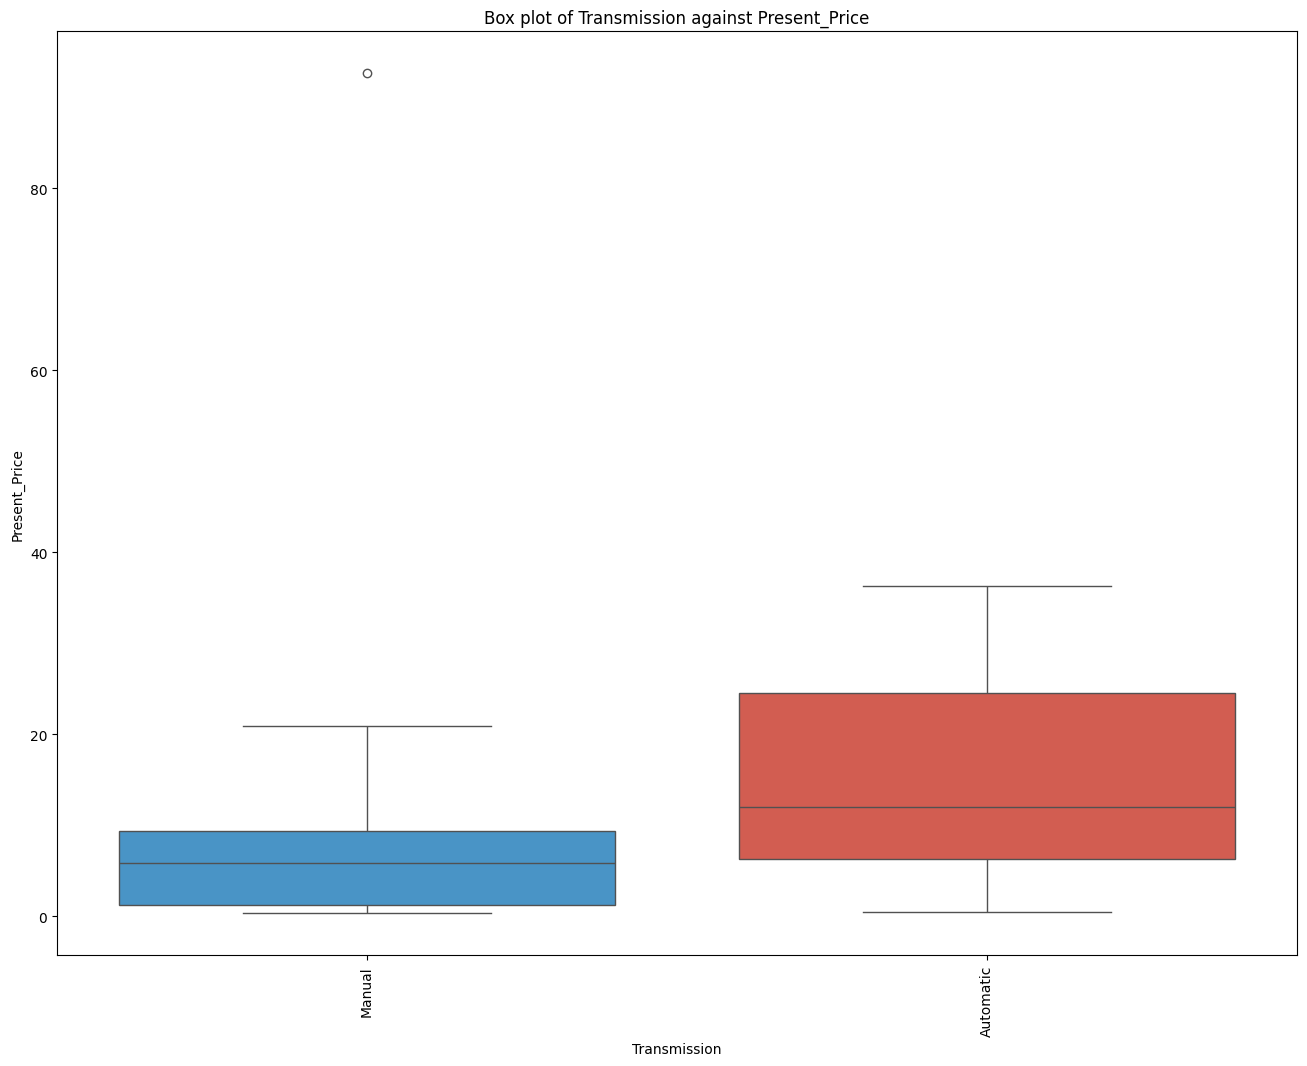

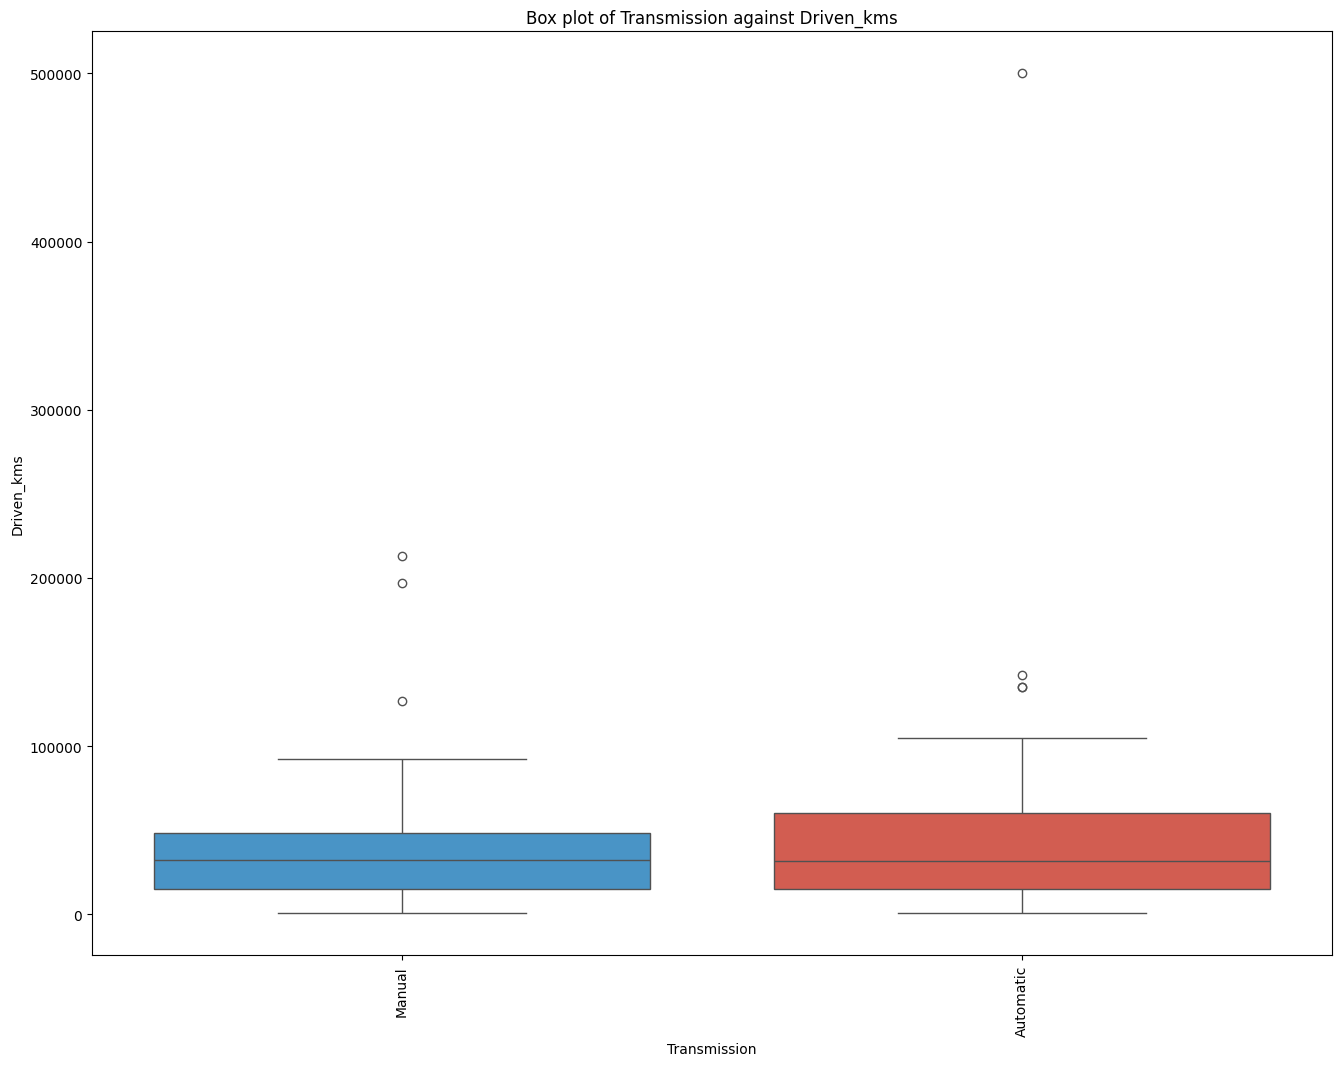

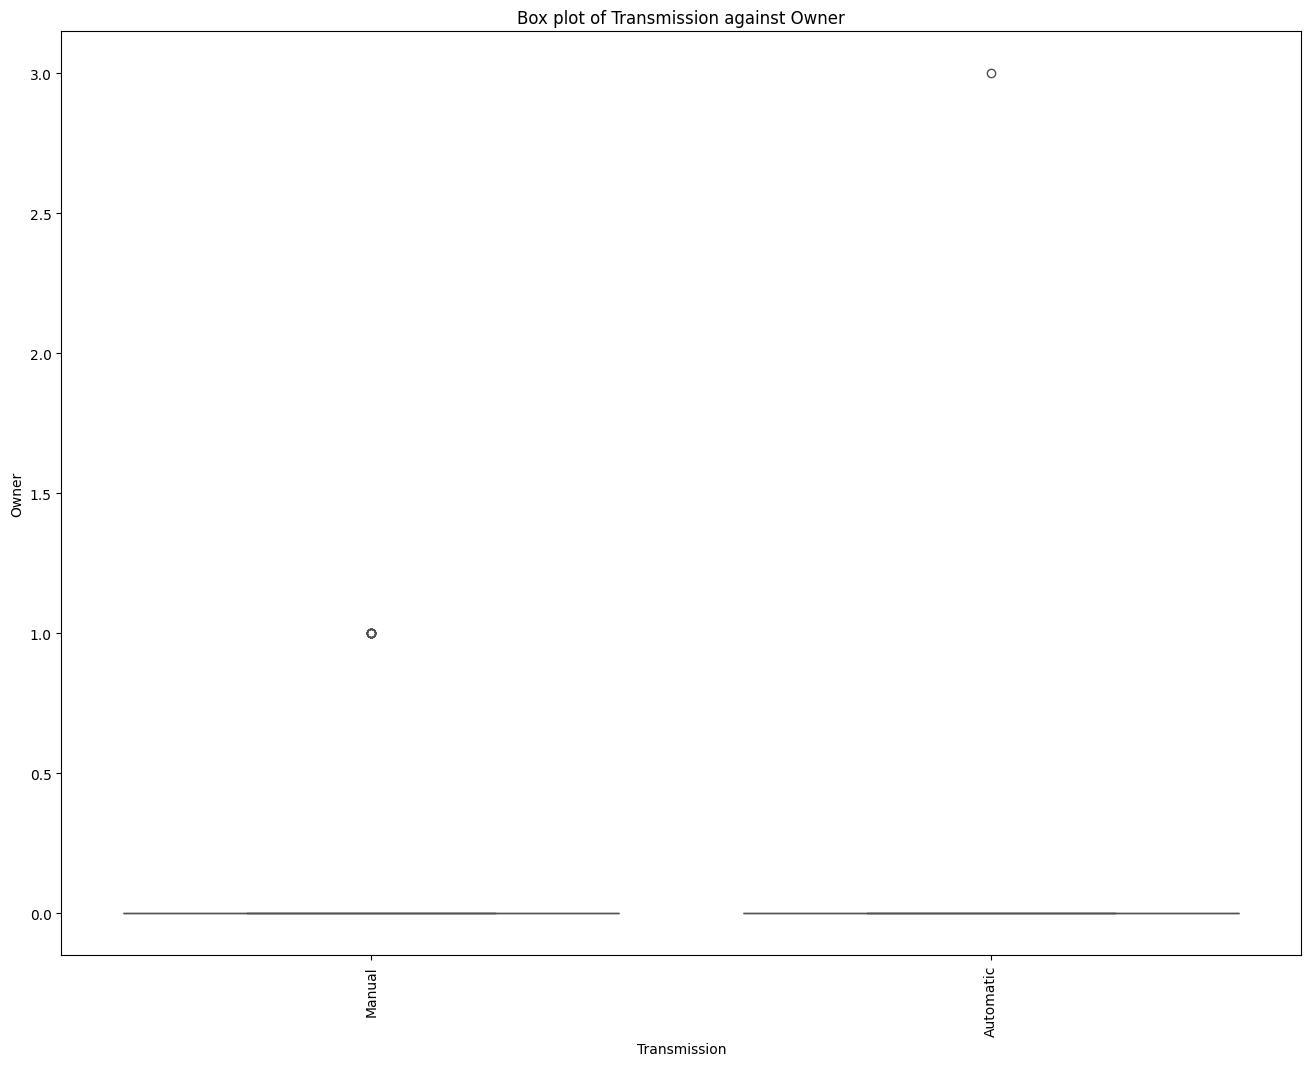

In [22]:
#Lists of palette to be used
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f", "#9b59b6"]


#Box plot for categorical columns against numerical columns
for column_x in categorical_columns:
  for column_y in numerical_data_columns:
    plt.figure(figsize = (16, 12))
    sns.boxplot(x = column_x, y = column_y, data = df, palette = custom_palette)
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.title(f"Box plot of {column_x} against {column_y}")
    plt.xticks(rotation = 90)
    plt.show()

#Encoding Labels

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [24]:
#Label Encoder
le = LabelEncoder()

for label in categorical_columns:
  df[label] = le.fit_transform(df[label])

In [25]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


#Feature Selection

In [26]:
#Best feature selection using correlation
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Selling_Price'].sort_values(ascending = False)
print("Correlation with target\n", correlation_with_target)

Correlation with target
 Selling_Price    1.000000
Present_Price    0.876305
Car_Name         0.501429
Year             0.234369
Driven_kms       0.028566
Owner           -0.087880
Transmission    -0.348869
Fuel_Type       -0.500292
Selling_type    -0.553851
Name: Selling_Price, dtype: float64


In [27]:
#Definition of threshold
threshold = 0.5
features_selected = correlation_with_target[correlation_with_target.abs() > threshold].index
print(f"Features selected\n {features_selected}")

Features selected
 Index(['Selling_Price', 'Present_Price', 'Car_Name', 'Fuel_Type',
       'Selling_type'],
      dtype='object')


#Scaling

In [28]:
x = df[features_selected].drop('Selling_Price', axis = 1)
y = df['Selling_Price']

#Scaling
scaler = StandardScaler()
X = scaler.fit_transform(x)
X



array([[-0.22813821,  1.07634401,  0.49184668, -0.74109567],
       [ 0.23374233,  1.1936136 , -1.88012358, -0.74109567],
       [ 0.26999119,  0.21636698,  0.49184668, -0.74109567],
       ...,
       [ 0.40446274,  0.25545684,  0.49184668, -0.74109567],
       [ 0.57986041,  0.25545684, -1.88012358, -0.74109567],
       [-0.19188936,  0.13818725,  0.49184668, -0.74109567]])

#Train-test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Best Model Selection and Evaluation

Models to be implemmented

*   Linear Regression
*   Random Forest
*   Gradient Boosting
*   Support Vector Machine
*   K-Nearest Neighbors
*   Decision Tree
*   Ada Boost




In [30]:
#List of models to be evaluated

models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(random_state = 42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state = 42)),
    ("Support Vector Machine", SVR()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Decision Tree", DecisionTreeRegressor(random_state = 42)),
    ("Ada Boost", AdaBoostRegressor(random_state = 42))
]

#Initialising variables to track the best model and its metrics
best_model = None

#Initialising the best mean squared error (mse) and coefficient of determination(r2) values with infinity values
best_mse = np.inf
best_r2 = -np.inf

#List to store results
model_names = []
mse_scores = []
r2_scores = []

#Iterating over models for their performance evaluation
for name, model in models:
  #Creating a pipeline for model evaluation
  pipeline = Pipeline([
      ("model", model)
  ])

  #Model evaluation using cross validation
  mse = np.mean(-cross_val_score(pipeline, X_train, y_train, cv = 5, scoring = "neg_mean_squared_error"))
  r2 = np.mean(cross_val_score(pipeline, X_train, y_train, cv = 5, scoring = "r2"))

  #Print metrics for model performance
  print(f"Model: {name}")
  print(f"Cross-validation Mean Squared Error: {mse}")
  print(f"Cross-validation Coefficient of Determination: {r2}")
  print()

  #Appending results to lists
  model_names.append(name)
  mse_scores.append(mse)
  r2_scores.append(r2)

  #Checking for best model
  if mse < best_mse and r2 > best_r2:
    best_model = name
    best_mse = mse
    best_r2 = r2

#Dataframe to display results
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean Squared Error': mse_scores,
    'Coefficient of Determination': r2_scores,
})



#Print best model (based on MSE and r2)and its performance metrics
print(f"Best Model: {best_model}")
print(f"Best Cross-validation Mean Squared Error: {best_mse}")
print(f"Best Cross-validation Coefficient of Determination: {best_r2}")
print()

Model: Linear Regression
Cross-validation Mean Squared Error: 5.319875326863251
Cross-validation Coefficient of Determination: 0.7856665238373381

Model: Random Forest
Cross-validation Mean Squared Error: 4.537182843907494
Cross-validation Coefficient of Determination: 0.8013117821077206

Model: Gradient Boosting
Cross-validation Mean Squared Error: 4.647906291221718
Cross-validation Coefficient of Determination: 0.8020143267079215

Model: Support Vector Machine
Cross-validation Mean Squared Error: 10.059363255275375
Cross-validation Coefficient of Determination: 0.6317239836360529

Model: K-Nearest Neighbors
Cross-validation Mean Squared Error: 4.86290469574468
Cross-validation Coefficient of Determination: 0.7938359407063933

Model: Decision Tree
Cross-validation Mean Squared Error: 6.02268770505661
Cross-validation Coefficient of Determination: 0.7280723704894922

Model: Ada Boost
Cross-validation Mean Squared Error: 4.7432232078162
Cross-validation Coefficient of Determination: 0.7

In [31]:
#Show results data frame
print("Results")
print(results_df)

Results
                    Model  Mean Squared Error  Coefficient of Determination
0       Linear Regression            5.319875                      0.785667
1           Random Forest            4.537183                      0.801312
2       Gradient Boosting            4.647906                      0.802014
3  Support Vector Machine           10.059363                      0.631724
4     K-Nearest Neighbors            4.862905                      0.793836
5           Decision Tree            6.022688                      0.728072
6               Ada Boost            4.743223                      0.797506


In [32]:
#Save the model
pickle.dump(best_model, open("best_model_car_price_prediction.pk1", "wb"))

#Conclusion
For all the models evaluated, Random Forest and Gradient Boosting works well for modeling this dataset